# Segunda lista - Problema grupal 1

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero i Martí

## Predicción del uso de bicicletas

### El uso compartido de bicicletas es un servicio proporcionado por cualquier ciudad importante del mundo, por lo que comprender y predecir el comportamiento del sistema es un elemento clave. Vamos a trabajar con el conjunto de datos de bicicletas compartidas del repositorio de conjuntos de datos de UCI que recopila estadísticas agregadas de uso de bicicletas junto con otra información adicional relevante. Se pueden descargar los datos desde aquí [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

### El objetivo de este problema es predecir cúantas bicicletas se usarán diáriamente (el archivo day.csv). Podéis leer en el $\texttt{Readme.txt}$ los detalles sobre las variables

### Procedamos con los ejercicios que se nos piden

#### a) El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no són útiles para el problema o que no tiene sentido usar. Eliminad-las del conjunto de datos. Dividid los datos en conjuntos de entrenamiento y test $(60\%/40\%)$. Haced una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describid las cosas que hayáis visto que os parezcan interesantes. Estandarizad las variables(calculad el estandarizador a partir de los datos del entrenamiento y luego aplicadlo a los datos de test).

In [1]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
# !pip install pandas --upgrade --user --quiet
# !pip install numpy --upgrade --user --quiet
# !pip install scipy --upgrade --user --quiet
# !pip install statsmodels --upgrade --user --quiet
# !pip install scikit-learn --upgrade --user --quiet
# !pip install plotly --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet

#### Imports varios

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn import set_config
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import PoissonRegressor

from sklearn.manifold import TSNE

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from statsmodels.genmod.generalized_linear_model import GLM

from yellowbrick.regressor import AlphaSelection
from yellowbrick.target.feature_correlation import feature_correlation

from scipy import stats

#### Cargamos el conjunto de datos

In [3]:
bicicletas_data = pd.read_csv("./Bike-Sharing-Dataset/day.csv", header=0, delimiter=',')

bicicletas_data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Breve información sobre las features del conjunto de datos

In [4]:
bicicletas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Breve estadística descriptiva sobre el conjunto de datos

In [5]:
bicicletas_data.describe(include='all').T

count unique         top freq         mean          std       min  \
instant     731.0    NaN         NaN  NaN        366.0   211.165812       1.0   
dteday        731    731  2011-01-01    1          NaN          NaN       NaN   
season      731.0    NaN         NaN  NaN      2.49658     1.110807       1.0   
yr          731.0    NaN         NaN  NaN     0.500684     0.500342       0.0   
mnth        731.0    NaN         NaN  NaN     6.519836     3.451913       1.0   
holiday     731.0    NaN         NaN  NaN     0.028728     0.167155       0.0   
weekday     731.0    NaN         NaN  NaN     2.997264     2.004787       0.0   
workingday  731.0    NaN         NaN  NaN     0.683995     0.465233       0.0   
weathersit  731.0    NaN         NaN  NaN     1.395349     0.544894       1.0   
temp        731.0    NaN         NaN  NaN     0.495385     0.183051   0.05913   
atemp       731.0    NaN         NaN  NaN     0.474354     0.162961   0.07907   
hum         731.0    NaN         NaN  NaN     0.627894     0.142429       0.0   
windspeed   731.0    NaN         NaN  NaN     0.190486     0.077498  0.022392   
casual      731.0    NaN         NaN  NaN   848.176471   686.622488       2.0   
registered  731.0    NaN         NaN  NaN  3656.172367  1560.256377      20.0   
cnt         731.0    NaN         NaN  NaN  4504.348837  1937.211452      22.0   

                 25%       50%       75%       max  
instant        183.5     366.0     548.5     731.0  
dteday           NaN       NaN       NaN       NaN  
season           2.0       3.0       3.0       4.0  
yr               0.0       1.0       1.0       1.0  
mnth             4.0       7.0      10.0      12.0  
holiday          0.0       0.0       0.0       1.0  
weekday          1.0       3.0       5.0       6.0  
workingday       0.0       1.0       1.0       1.0  
weathersit       1.0       1.0       2.0       3.0  
temp        0.337083  0.498333  0.655417  0.861667  
atemp       0.337842  0.486733  0.608602  0.840896  
hum             0.52  0.626667  0.730209    0.9725  
windspeed    0.13495  0.180975  0.233214  0.507463  
casual         315.5     713.0    1096.0    3410.0  
registered    2497.0    3662.0    4776.5    6946.0  
cnt           3152.0    4548.0    5956.0    8714.0

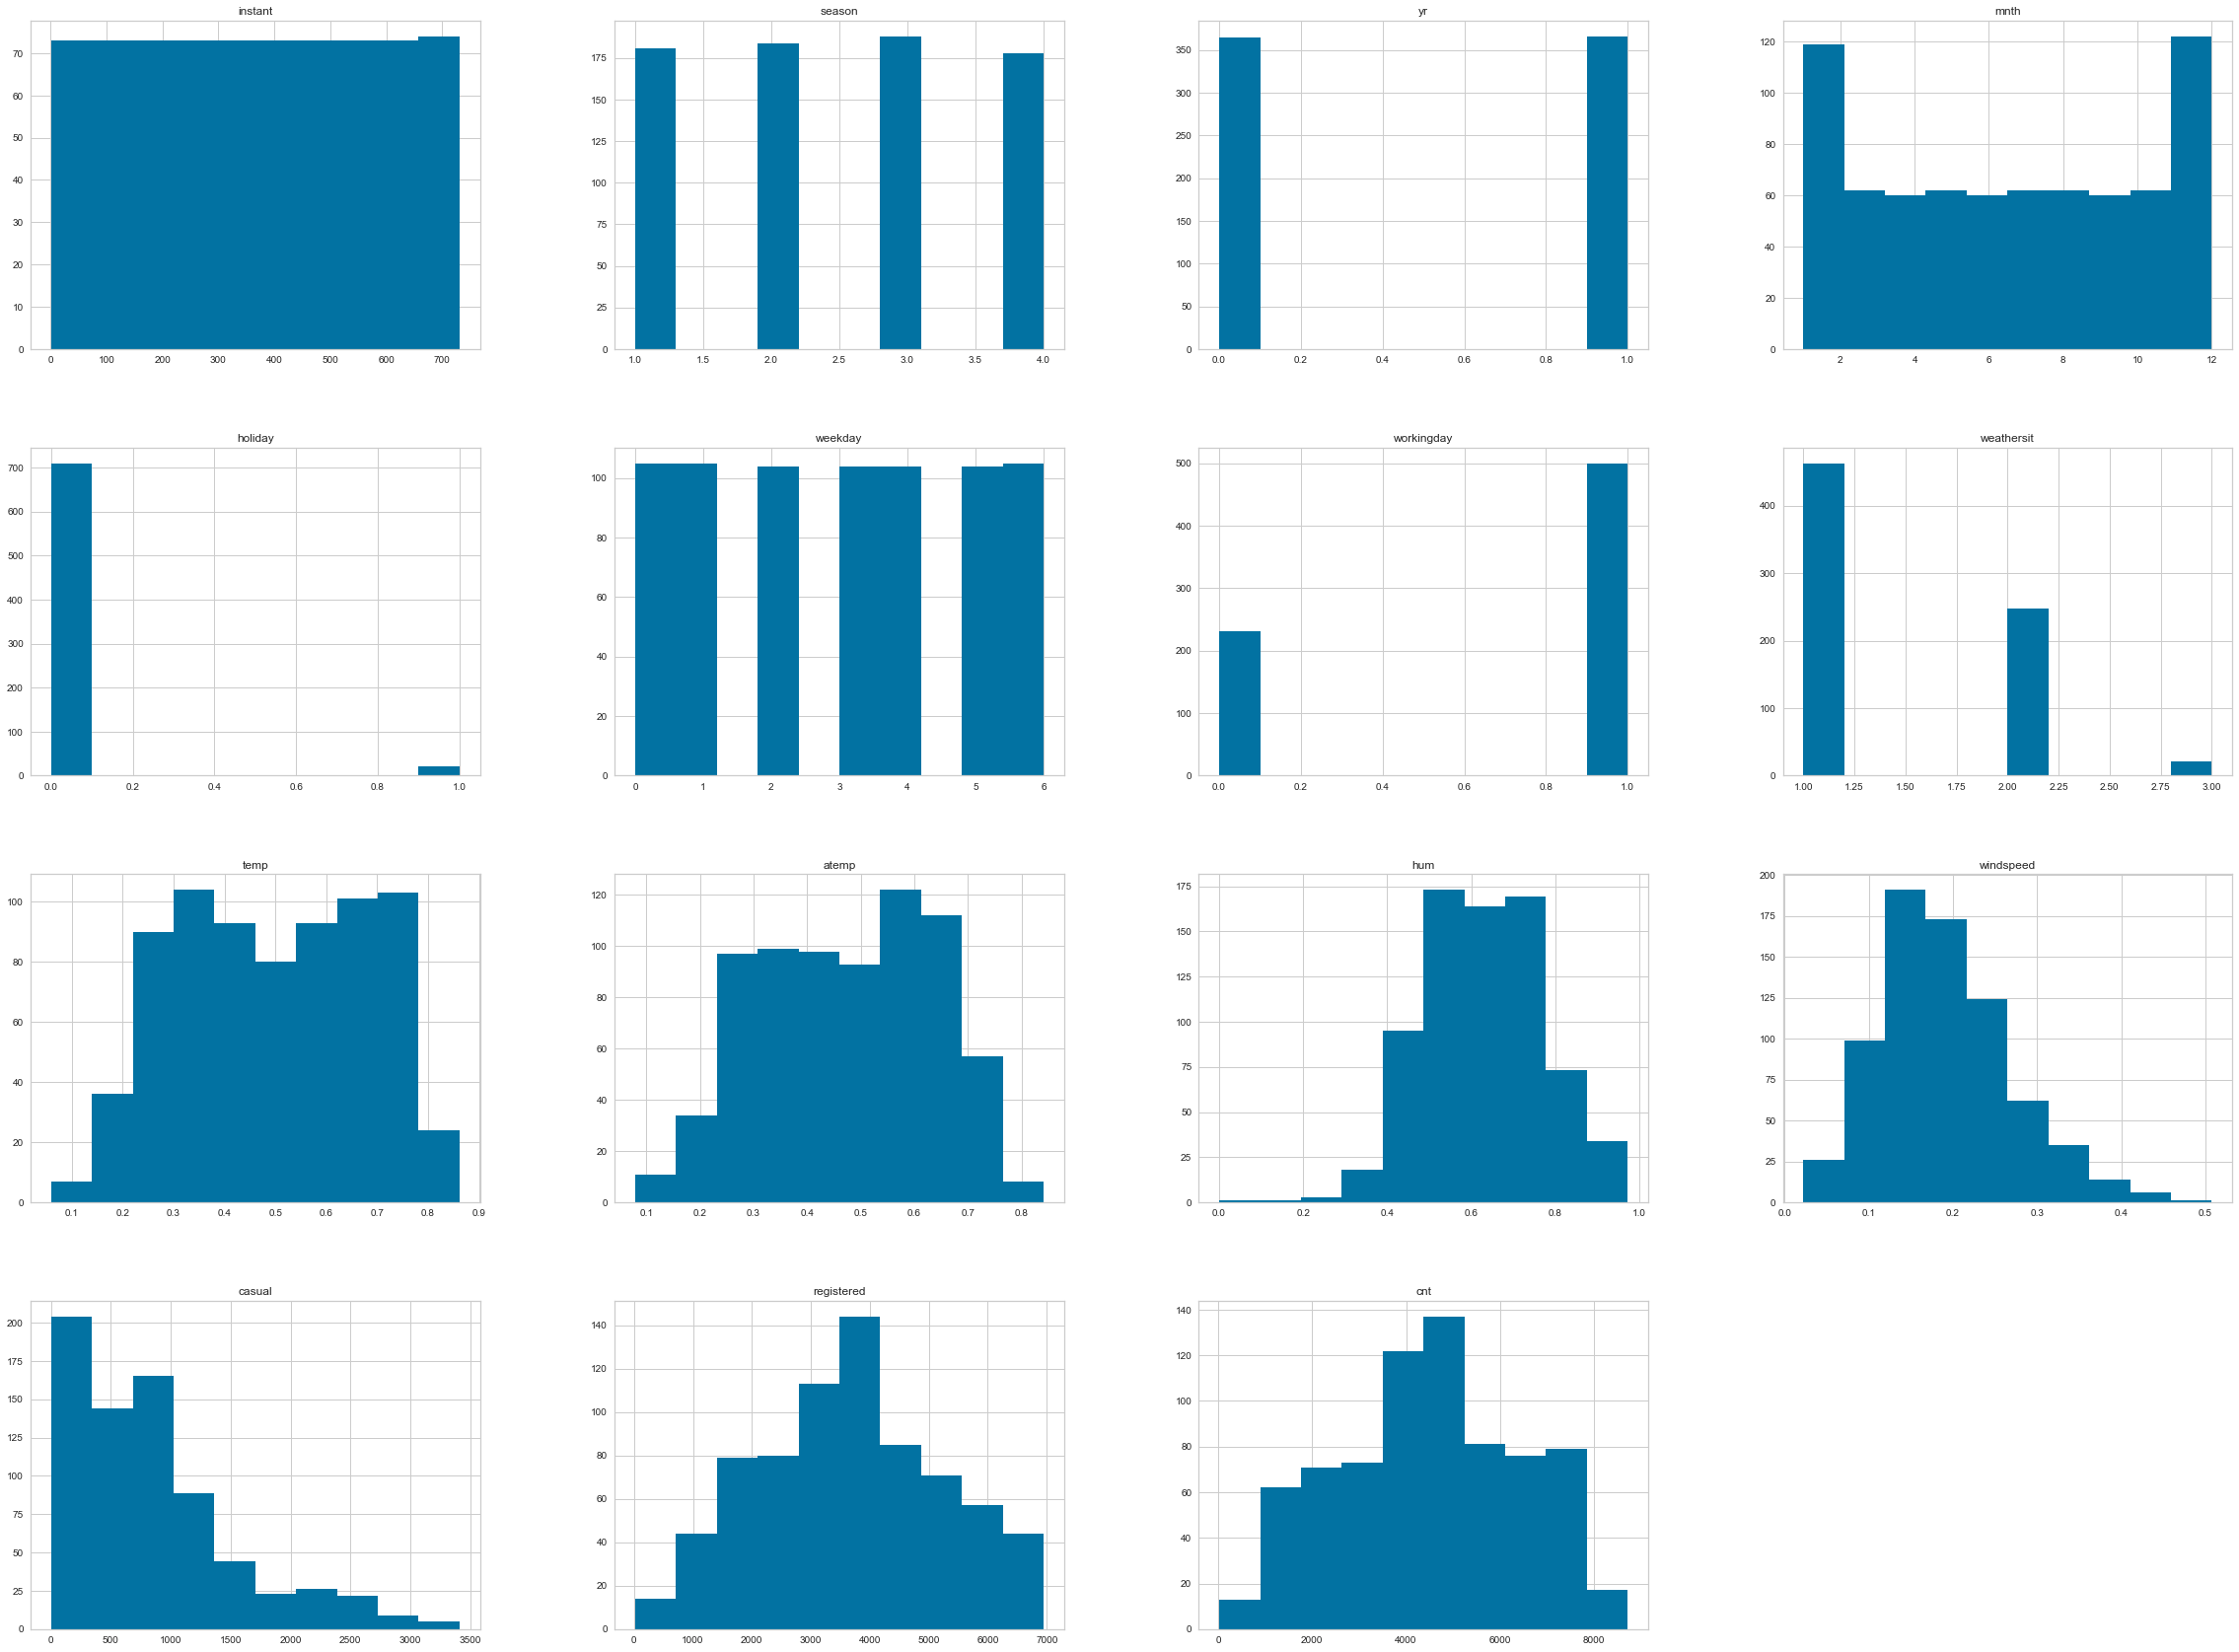

In [6]:
bicicletas_data.hist(figsize=(40,30));

#### Preprocesamiento y preparación de los datos antes de ajustar el modelo.

###### Eliminamos del conjunto de datos las variables que no són útiles para el problema o que no tiene sentido usar

Vemos que en el conjunto de datos no tenemos como ya hemos visto, datos faltantes, pero si que contamos con datos inecesarios. Procedamos a eliminar las variables innecesarias:

- Vemos que tenemos la variable **instant** que simplemente es un identificador
- También tenemos la variable **dteday** que no nos es relevante ya que podemos obtener su información a partir de otras del dataset
- Tambíen vemos que la suma de las variables de **casual** i **registered** nos da el conteo de bicicletas que justamente queremos predecir.
- Asimismo podemos eliminar la variable **workingday** ya que podemos extraer su información de las variables de **holiday** y **weekday** (Hemos probado de ejectuar el modelo teniendo en cuenta esta variable y únicamente varia ligeramente para Poison pasando de una R^2 de 0.824 a 0.818)

In [7]:
bicicletas_data.drop(columns=['instant' , 'dteday', 'casual', 'registered','workingday'], inplace=True)

In [8]:
bicicletas_data.describe(include='all').T

count         mean          std        min          25%  \
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
cnt         4548.000000  5956.000000  8714.000000

#### Con los histogramas podemos ver cierto comportamiento categórico en algunas variables del dataset

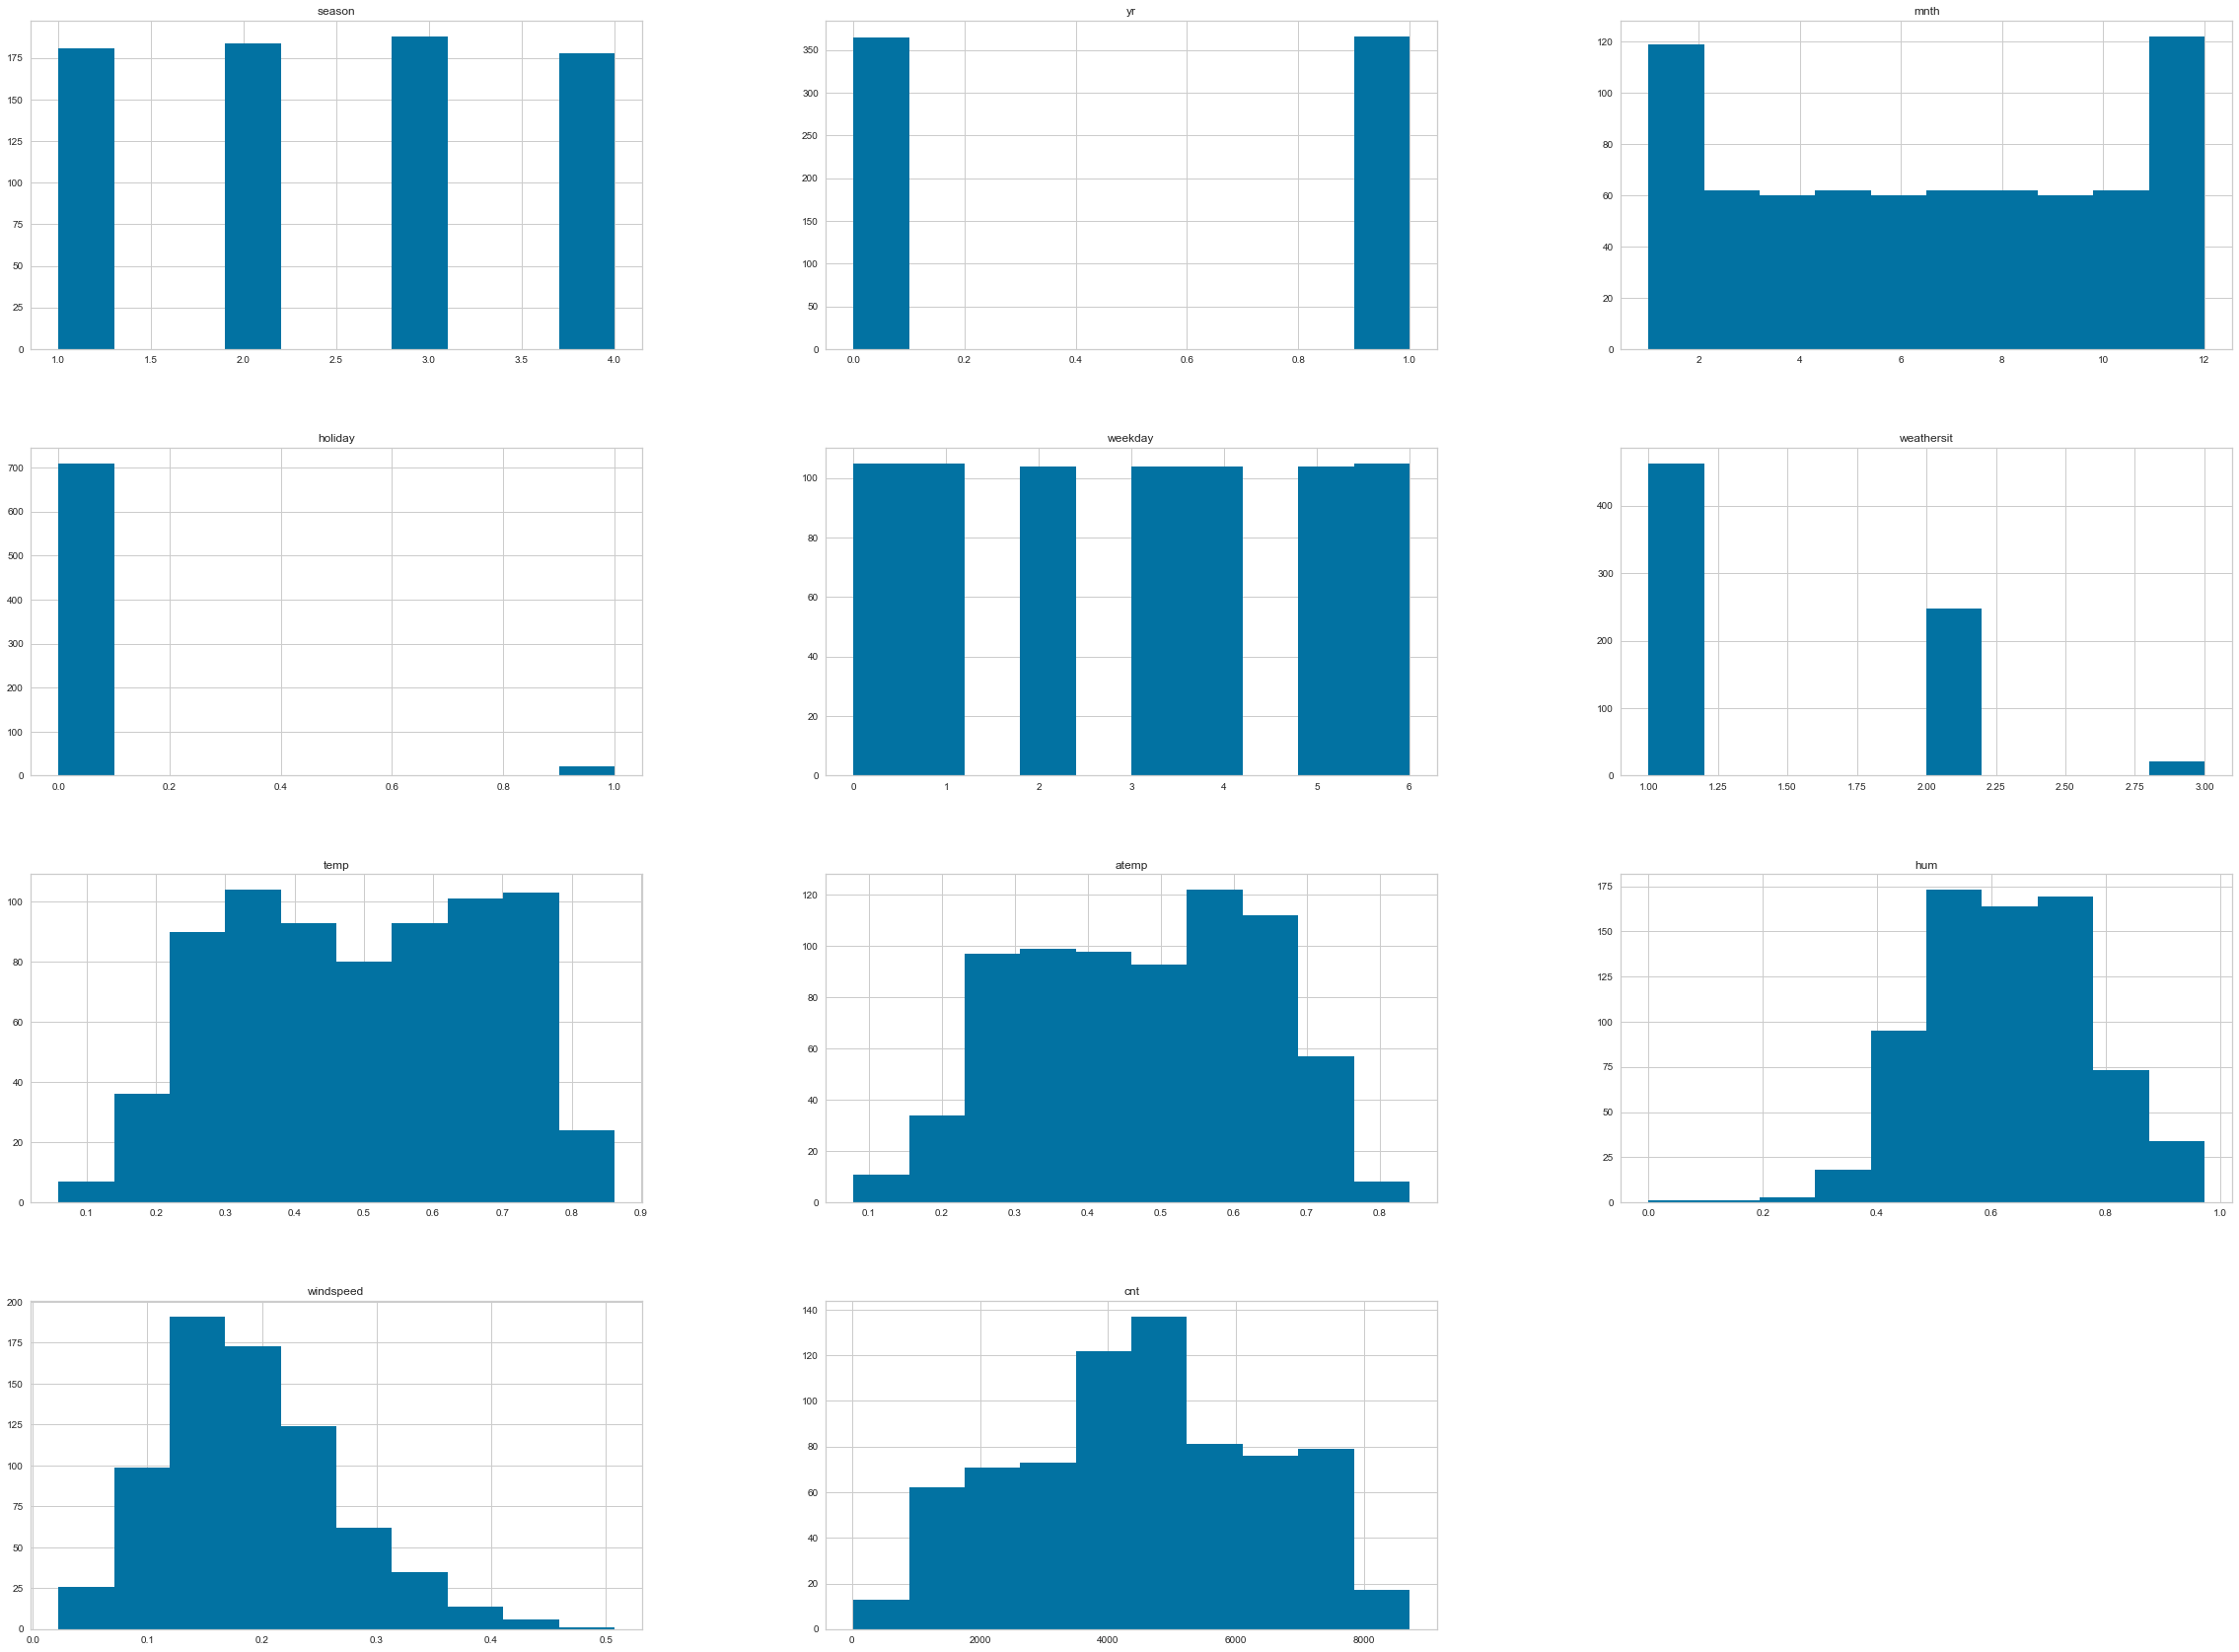

In [9]:
bicicletas_data.hist(figsize=(40,30));

##### Correlación entre las variables predictoras

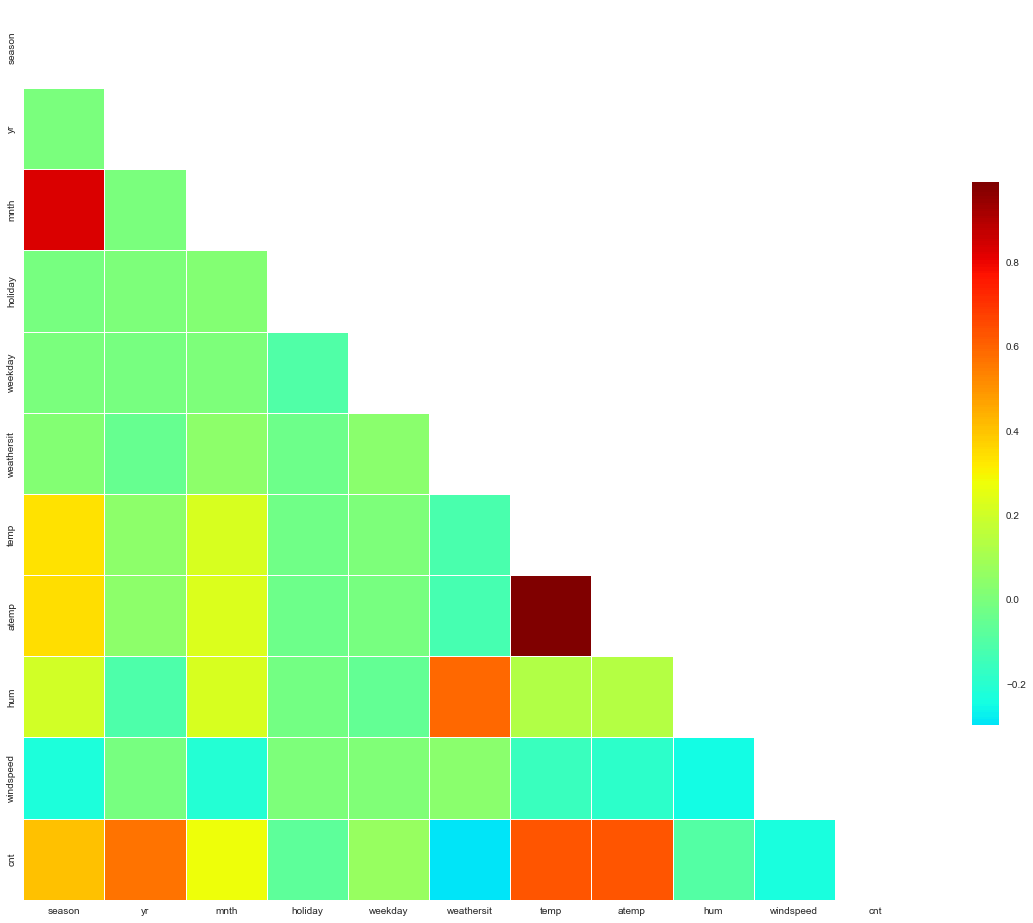

In [10]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

##### Vemos que entre distintintas variables numéricas, estas toman valores categóricos, es por este motivo que aplicamos one-hot encoding para las variables que toman estos valores discretos en cada rango

In [11]:
bicicletas_data = pd.get_dummies(bicicletas_data, columns = ['yr','mnth','season','holiday','weekday','weathersit'], drop_first=True)

##### Correlación entre las distintas variables predictoras una vez aplicado el one-hot encoding

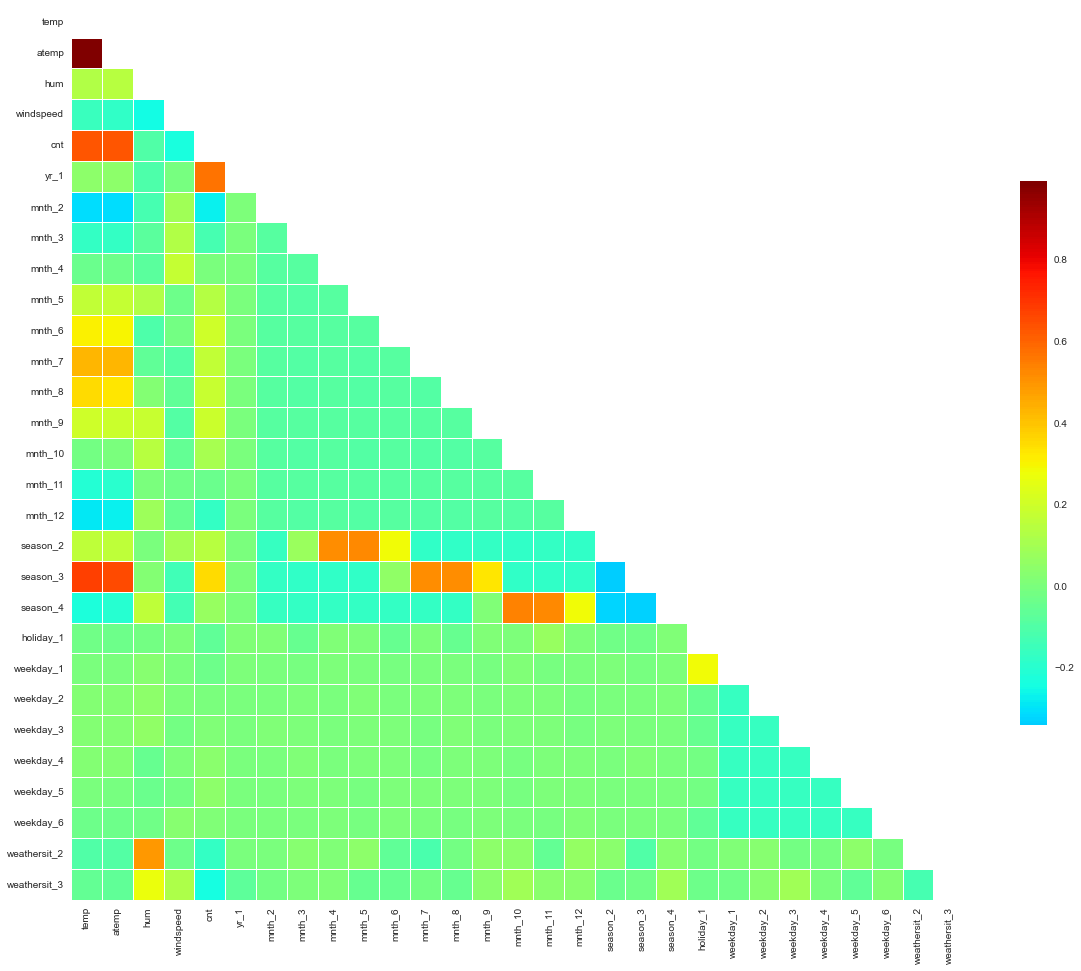

In [12]:
corr = bicicletas_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

Podemos ver que algunas variables muestra cierta relación con otras. Por ejemplo **atemp** y **temp** muestran un comportamiento muy marcado con **month** y con **season**. 

A su vez **temp** y **atemp** muestan un relación lineal entre ellas como es de esperar, así como también entre las variables month y season. Notamos que podemas observar la clasificación de los distintos mesos en cada época del año. Y la correspondencia de qué época correponde por cada mes del año.

También vemos un comportamiento tendencioso de **cnt** frente a las variables **weekday** y **mnth**. En la que se favorecen los valores 0 y 6 (probablemtne sabado y domingo) y en "mnth" hay un aumento de 0 a 6 - 7 para volver a disminuir entre 8 y 11.

##### Dividimos el conjunto de datos en entrenamiento y test

In [13]:
X = bicicletas_data.loc[:,bicicletas_data.columns != 'cnt']
y = bicicletas_data['cnt']

##### Transformamos las variables numéricas adecuadamente en un mismo rango para poder ajustar el modelo

In [14]:
 def scaling_preprocessing(X, y, scaler=None):
    print('Tamaño Original:{}'.format(X.shape))
    categorical_columns = X.dtypes[X.dtypes == 'object'].index.values
    
    # Escalamos las variables numericas
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    if scaler is None: 
        # Generamos el scaler cuando los datos son los de entrenamiento
        scaler = MinMaxScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    return X, y, scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, y_train, scaler = scaling_preprocessing(X_train,y_train)
X_test, y_test, _ = scaling_preprocessing(X_test,y_test,scaler)

Tamaño Original:(438, 28)
Tamaño Original:(293, 28)


##### Relación de la variable objetivo con todas las variables predictoras

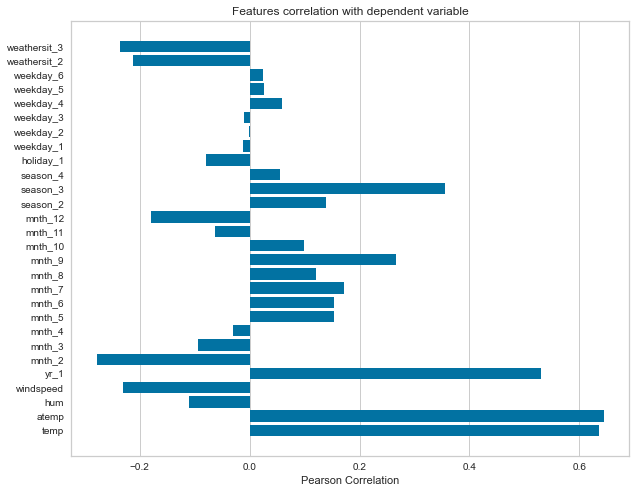

In [15]:
plt.figure(figsize=(10,8))
visualizer = feature_correlation(X_train, y_train, labels=list(X_train.columns),method='pearson');

##### A continunación compararemos y comentaremos un poco la dependencia lineal entre la característica objetivo contra las demás características.

Como bien sabemos, el coeficiente de correlación de Pearson puede abarcar un rango de -1 a 1. Y dos características tienen una correlación positiva perfecta si r = 1, ninguna correlación si r = 0 y una correlación negativa perfecta si r = -1. Como podemos ver en la lista anterior, o en los gráficos anteriores, podemos notar, lo siguente, por orden de correlación:

*CORRELACIÓN POSITIVA*

- Existe una correlación importante positiva evidente entre las variables **temp** i **atemp** contra la variable **cnt**.

- Exsiste una correlación positiva entre las variables **season1, season2, season3** contra la variable **cnt** ya que durante las épocas de primavera, verano y otoño, respectivamente se hará un uso mayor diario de bicicletas. 

- Esto también lo podemos extender a los meses que se incluyen en cada época del año, como vemos, los meses que pertenecen a una época en concreto de las tres vistas en el punto anterior, tendran una relación positiva con la variable count(**month5, month6, month7, month8, month9, month10**). Vemos que justamente hay meses de transición, como entre (otoño e invierno) y (invierno y primavera) donde la correlación baja con la variable count pasará a ser negativa, puesto que hará más frio y el uso de bicicletas será menor en el primer caso y en el segundo, cuando pasemos de invierno a primavera la correlació negativa será menor ya que cada vez usaremos más bicicletas diáriamente.

- También tenemos una correlación positiva segun el tiempo que nos da la variable **weather_sit1**

*CORRELACIÓN NEGATIVA*

- Existe una correlación importante negativa entre la variable **season0** i la variable **cnt**, esto es evidente ya que en el época de invierno debido al frio se usarán menos bicicletas.

- Esto se puede extender a los meses que pertencen a la época de invierno con los meses que transicionan la siguiente época del año(**month11, month12, month1, month2, month3, month4**)

- También tenemos una correlación negativa importante segun el tiempo que nos dan las variables **weather_sit2** y **weather_sit3**. Eso se extiende a las variables **hum** y **windspeed**, pues si hace peor tiempo, el conteo de bicicletad que se usarán en la ciudad y que computaremos será menor.

- Vemos que curiosamente si es domingo (**weekday0**), sabremos que se van a usar menos bicicletas puesto que la gente alomejor prefiere quedarse en casa.

*CORRELACIÓN PRÓXIMA A 0*

Observamos que no existe casi corerlación entre la variables que siguien y la variable objetivo:

- Vemos que dependiendo el dia de la semana afecta poco o casi nada al conteo de bicicletas. Si se trata de los días (**lunes, martes, miércoles, viernes, sábado**) (**weekday1, weekday2, weekday3, weekday5,weekday6**) apenas afecta sobre la variable count.

##### Vemos como se ha realizado el escalado de las variables

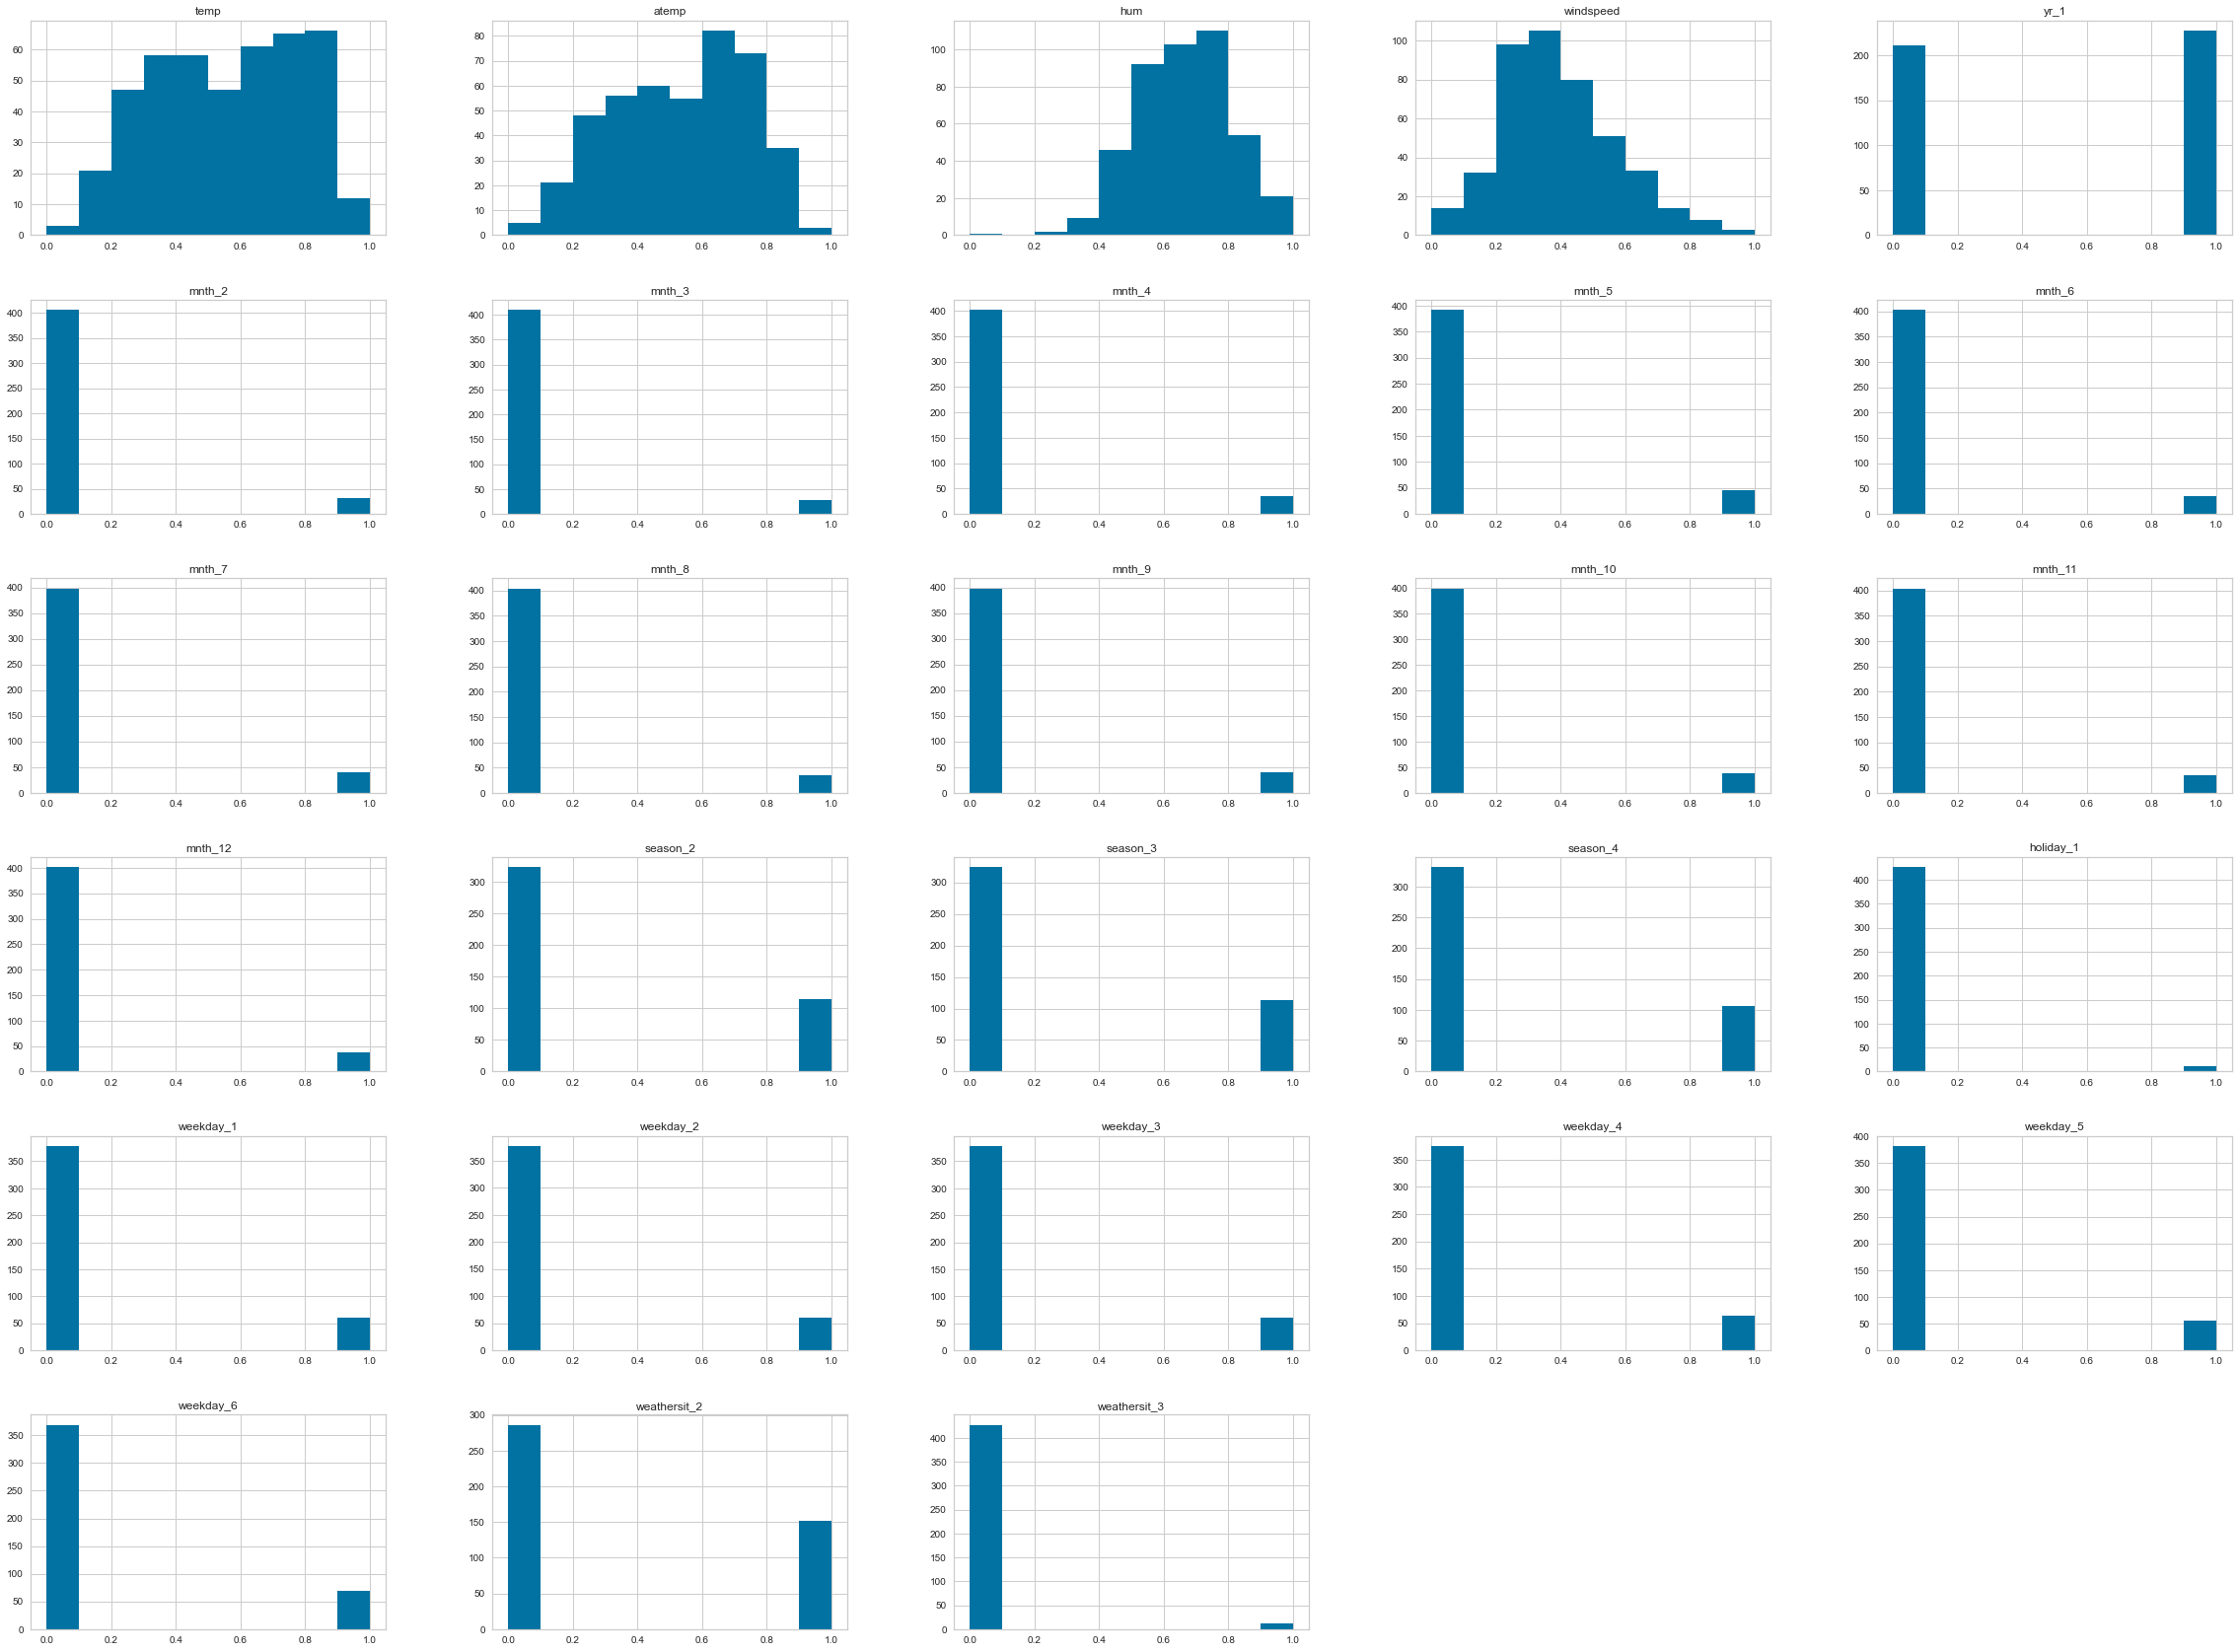

In [16]:
X_train.hist(figsize=(40,30));

### Probamos de ajustar un modelo lineal

In [17]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [   16.79405741  4282.52773232 -1366.36161831  -839.43138958
  1958.82284427   168.85208793   552.80219394   350.91978208
   555.96513999   243.73796465  -332.34889742   -30.510251
   788.08951143   229.98253505  -346.38672878  -180.6745111
   874.10215952   984.79884172  1660.52750405  -731.29461972
   179.94844639   249.19059714   330.27132971   279.07100953
   412.29193198   421.3583805   -570.37840828 -1842.5228962 ]
Interceptor: 
 1460.9547652233232


In [18]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        18:25:20   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1460.9548    303.399      4.815      0.000     864.538    2057.371
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
yr_1          1958.8228     76.120     25.733      0.000    1809.188    2108.458
mnth_2         168.8521    191.457      0.882      0.378    -207.511     545.215
mnth_3         552.8022    229.813      2.405      0.017     101.039    1004.565
mnth_4         350.9198    346.105      1.014      0.311    -329.447    1031.287
mnth_5         555.9651    368.272      1.510      0.132    -167.977    1279.907
mnth_6         243.7380    391.416      0.623      0.534    -525.700    1013.176
mnth_7        -332.3489    414.451     -0.802      0.423   -1147.069     482.371
mnth_8         -30.5103    406.753     -0.075      0.940    -830.097     769.076
mnth_9         788.0895    353.091      2.232      0.026      93.990    1482.189
mnth_10        229.9825    312.772      0.735      0.463    -384.858     844.823
mnth_11       -346.3867    303.930     -1.140      0.255    -943.847     251.074
mnth_12       -180.6745    235.257     -0.768      0.443    -643.139     281.790
season_2       874.1022    264.042      3.310      0.001     355.053    1393.151
season_3       984.7988    286.818      3.434      0.001     420.977    1548.621
season_4      1660.5275    238.480      6.963      0.000    1191.728    2129.327
holiday_1     -731.2946    249.512     -2.931      0.004   -1221.781    -240.808
weekday_1      179.9484    144.972      1.241      0.215    -105.034     464.931
weekday_2      249.1906    138.495      1.799      0.073     -23.061     521.442
weekday_3      330.2713    138.655      2.382      0.018      57.705     602.837
weekday_4      279.0710    139.013      2.008      0.045       5.802     552.340
weekday_5      412.2919    141.186      2.920      0.004     134.752     689.832
weekday_6      421.3584    133.805      3.149      0.002     158.327     684.390
weathersit_2  -570.3784    100.939     -5.651      0.000    -768.803    -371.953
weathersit_3 -1842.5229    266.950     -6.902      0.000   -2367.288   -1317.758
==============================================================================
Omnibus:                       75.338   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.601
Skew:                          -0.874   Prob(JB):                     1.00e-39
Kurtosis:                       5.605   Cond. No.                         160.
==============================================================================

Notes:
[1] Stand

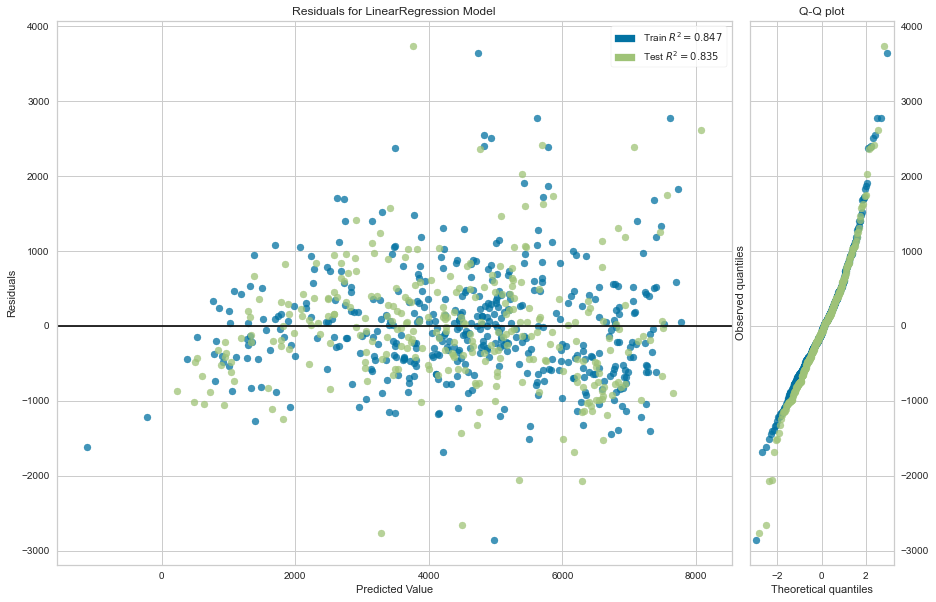

In [19]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

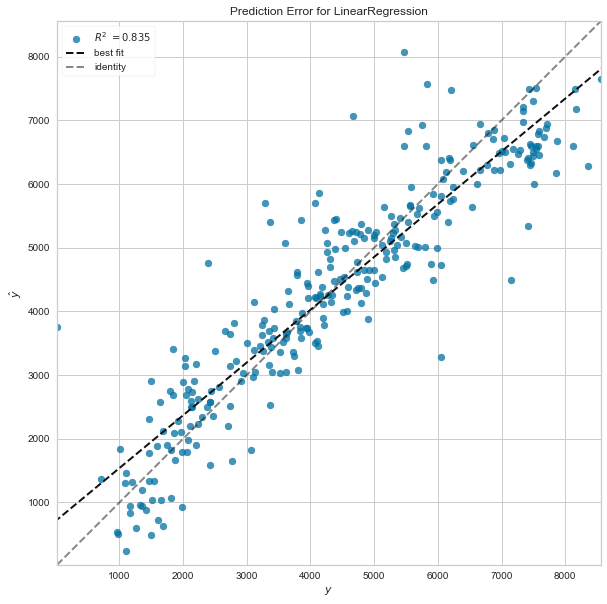

In [20]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

#### Aplicamos Validación cruzada

In [21]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

#considerar canviar la varible del kf per 5, val no és viable
kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 639733.509 NMSE: 0.200 R2: 0.800
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 554815.240 NMSE: 0.149 R2: 0.851
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 673389.187 NMSE: 0.164 R2: 0.836
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 879439.941 NMSE: 0.207 R2: 0.793
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 703448.715 NMSE: 0.188 R2: 0.812
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 752461.209 NMSE: 0.336 R2: 0.664
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 906209.365 NMSE: 0.245 R2: 0.755
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 597667.316 NMSE: 0.149 R2: 0.851
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 548354.203 NMSE: 0.165 R2: 0.835
Split 10: 
	Test Fo

In [22]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

MSE  norm_MSE        R2
Fold 1   639733.509363  0.200135  0.799865
Fold 2   554815.239977  0.149287  0.850713
Fold 3   673389.186627  0.163923  0.836077
Fold 4   879439.940818  0.207292  0.792708
Fold 5   703448.715269  0.188174  0.811826
Fold 6   752461.209294  0.336225  0.663775
Fold 7   906209.365459  0.244531  0.755469
Fold 8   597667.315603    0.1492    0.8508
Fold 9   548354.203211  0.164944  0.835056
Fold 10  432877.343731  0.124097  0.875903
Mean     668839.602935  0.192781  0.807219

In [23]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79986496, 0.85071341, 0.83607665, 0.79270761, 0.81182553,
        0.6637749 , 0.75546904, 0.85080047, 0.83505573, 0.87590293]),
 0.8072191222435693)

In [24]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

lr
CV R2     0.807219
Train R2  0.847215
lambda    0.000000

#### b) Aplicad algun método de reducción de dimensionalidad a los datos de entrenamiento y comentad lo que se pueda apreciar en la visualización. Pensad en qué podéis representar sobre la transformación.

Así pues este análisis de Componentes Princiaples(PCA) se basa en la matriz de covarianza de las variables. Por esta razón, si queremos que funcione de la mejor manera, debemos estandarizar los datos. Esto cambiará los datos para que todas las variables tengan media 0 y desviación estándar 1.

Con esta nueva representación queremos encuentrar las dimensiones linealmente independientes que puedan representar sin pérdidas el conjunto de de datos. Estas dimensiones recién encontradas nos deberían permitir predecir/reconstruir las dimensiones originales. Así pues, si minimizamos el error de reconstrucción/proyección de los datos, nuestra varianza augmentará.

In [25]:
X_train_standarized = X_train.copy()
scaler = StandardScaler()
X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

count          mean       std       min       25%       50%  \
temp          438.0 -1.001229e-16  1.001144 -2.480716 -0.869992  0.108509   
atemp         438.0  1.926414e-17  1.001144 -2.531515 -0.801925  0.172512   
hum           438.0  8.714490e-16  1.001144 -4.569408 -0.735420  0.043630   
windspeed     438.0 -5.424377e-17  1.001144 -2.251317 -0.719737 -0.161272   
yr_1          438.0  1.054458e-16  1.001144 -1.037222 -1.037222  0.964114   
mnth_2        438.0  1.191335e-17  1.001144 -0.280745 -0.280745 -0.280745   
mnth_3        438.0  1.898532e-16  1.001144 -0.261329 -0.261329 -0.261329   
mnth_4        438.0  2.007527e-16  1.001144 -0.299253 -0.299253 -0.299253   
mnth_5        438.0  1.196405e-16  1.001144 -0.342559 -0.342559 -0.342559   
mnth_6        438.0  1.934019e-16  1.001144 -0.294701 -0.294701 -0.294701   
mnth_7        438.0 -2.179890e-16  1.001144 -0.317021 -0.317021 -0.317021   
mnth_8        438.0 -3.219140e-17  1.001144 -0.290101 -0.290101 -0.290101   
mnth_9        438.0  4.917426e-17  1.001144 -0.317021 -0.317021 -0.317021   
mnth_10       438.0 -4.156999e-17  1.001144 -0.312641 -0.312641 -0.312641   
mnth_11       438.0 -9.403944e-17  1.001144 -0.290101 -0.290101 -0.290101   
mnth_12       438.0  2.504339e-16  1.001144 -0.303759 -0.303759 -0.303759   
season_2      438.0 -1.916275e-16  1.001144 -0.596688 -0.596688 -0.596688   
season_3      438.0  1.825024e-17  1.001144 -0.593171 -0.593171 -0.593171   
season_4      438.0  1.257239e-16  1.001144 -0.568562 -0.568562 -0.568562   
holiday_1     438.0 -7.946459e-17  1.001144 -0.167836 -0.167836 -0.167836   
weekday_1     438.0  1.787003e-16  1.001144 -0.398410 -0.398410 -0.398410   
weekday_2     438.0  8.846298e-17  1.001144 -0.402248 -0.402248 -0.402248   
weekday_3     438.0 -2.250863e-16  1.001144 -0.398410 -0.398410 -0.398410   
weekday_4     438.0 -5.804591e-17  1.001144 -0.409878 -0.409878 -0.409878   
weekday_5     438.0 -3.269835e-17  1.001144 -0.382880 -0.382880 -0.382880   
weekday_6     438.0  2.932712e-16  1.001144 -0.432426 -0.432426 -0.432426   
weathersit_2  438.0  2.073430e-16  1.001144 -0.729019 -0.729019 -0.729019   
weathersit_3  438.0  5.627158e-17  1.001144 -0.160503 -0.160503 -0.160503   

                   75%       max  
temp          0.863638  1.987637  
atemp         0.807409  2.233770  
hum           0.702780  2.332221  
windspeed     0.583358  3.452140  
yr_1          0.964114  0.964114  
mnth_2       -0.280745  3.561952  
mnth_3       -0.261329  3.826599  
mnth_4       -0.299253  3.341656  
mnth_5       -0.342559  2.919202  
mnth_6       -0.294701  3.393271  
mnth_7       -0.317021  3.154362  
mnth_8       -0.290101  3.447079  
mnth_9       -0.317021  3.154362  
mnth_10      -0.312641  3.198557  
mnth_11      -0.290101  3.447079  
mnth_12      -0.303759  3.292087  
season_2      1.675916  1.675916  
season_3      1.685854  1.685854  
season_4     -0.568562  1.758823  
holiday_1    -0.167836  5.958188  
weekday_1    -0.398410  2.509980  
weekday_2    -0.402248  2.486027  
weekday_3    -0.398410  2.509980  
weekday_4    -0.409878  2.439750  
weekday_5    -0.382880  2.611786  
weekday_6    -0.432426  2.312537  
weathersit_2  1.371707  1.371707  
weathersit_3 -0.160503  6.230424

In [26]:
X_test_standarized = X_test.copy()
X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

count      mean       std       min       25%       50%  \
temp          293.0 -0.129097  1.042519 -2.272529 -1.032888 -0.211639   
atemp         293.0 -0.147146  1.041438 -2.407855 -1.031907 -0.167167   
hum           293.0 -0.167353  1.044390 -3.221945 -0.954267 -0.243194   
windspeed     293.0  0.089472  1.129151 -1.912742 -0.719792 -0.042868   
yr_1          293.0 -0.087783  1.001065 -1.037222 -1.037222 -1.037222   
mnth_2        293.0  0.047130  1.075346 -0.280745 -0.280745 -0.280745   
mnth_3        293.0  0.213038  1.311497 -0.261329 -0.261329 -0.261329   
mnth_4        293.0 -0.001021  1.000153 -0.299253 -0.299253 -0.299253   
mnth_5        293.0 -0.164443  0.742381 -0.342559 -0.342559 -0.342559   
mnth_6        293.0  0.019972  1.032048 -0.294701 -0.294701 -0.294701   
mnth_7        293.0 -0.056371  0.916375 -0.317021 -0.317021 -0.317021   
mnth_8        293.0  0.067036  1.100578 -0.290101 -0.290101 -0.290101   
mnth_9        293.0 -0.080067  0.876948 -0.317021 -0.317021 -0.317021   
mnth_10       293.0 -0.037018  0.945967 -0.312641 -0.312641 -0.312641   
mnth_11       293.0  0.041526  1.064538 -0.290101 -0.290101 -0.290101   
mnth_12       293.0  0.003054  1.006267 -0.303759 -0.303759 -0.303759   
season_2      293.0 -0.061502  0.965934 -0.596688 -0.596688 -0.596688   
season_3      293.0 -0.017581  0.991886 -0.593171 -0.593171 -0.593171   
season_4      293.0 -0.004588  0.998961 -0.568562 -0.568562 -0.568562   
holiday_1     293.0  0.020335  1.058849 -0.167836 -0.167836 -0.167836   
weekday_1     293.0  0.048271  1.050411 -0.398410 -0.398410 -0.398410   
weekday_2     293.0  0.021628  1.023806 -0.402248 -0.402248 -0.402248   
weekday_3     293.0  0.038345  1.040767 -0.398410 -0.398410 -0.398410   
weekday_4     293.0 -0.011125  0.990274 -0.409878 -0.409878 -0.409878   
weekday_5     293.0  0.107714  1.110265 -0.382880 -0.382880 -0.382880   
weekday_6     293.0 -0.095161  0.902670 -0.432426 -0.432426 -0.432426   
weathersit_2  293.0 -0.047896  0.985005 -0.729019 -0.729019 -0.729019   
weathersit_3  293.0  0.057618  1.162336 -0.160503 -0.160503 -0.160503   

                   75%       max  
temp          0.777651  1.918039  
atemp         0.729342  2.004778  
hum           0.566480  2.403926  
windspeed     0.659514  4.348809  
yr_1          0.964114  0.964114  
mnth_2       -0.280745  3.561952  
mnth_3       -0.261329  3.826599  
mnth_4       -0.299253  3.341656  
mnth_5       -0.342559  2.919202  
mnth_6       -0.294701  3.393271  
mnth_7       -0.317021  3.154362  
mnth_8       -0.290101  3.447079  
mnth_9       -0.317021  3.154362  
mnth_10      -0.312641  3.198557  
mnth_11      -0.290101  3.447079  
mnth_12      -0.303759  3.292087  
season_2     -0.596688  1.675916  
season_3      1.685854  1.685854  
season_4     -0.568562  1.758823  
holiday_1    -0.167836  5.958188  
weekday_1    -0.398410  2.509980  
weekday_2    -0.402248  2.486027  
weekday_3    -0.398410  2.509980  
weekday_4    -0.409878  2.439750  
weekday_5    -0.382880  2.611786  
weekday_6    -0.432426  2.312537  
weathersit_2  1.371707  1.371707  
weathersit_3 -0.160503  6.230424

#### Como se verian las variables sin realizar el PCA... y la poca información que podemos sacar de nuestro conjunto de datos

<AxesSubplot:xlabel='hum', ylabel='windspeed'>

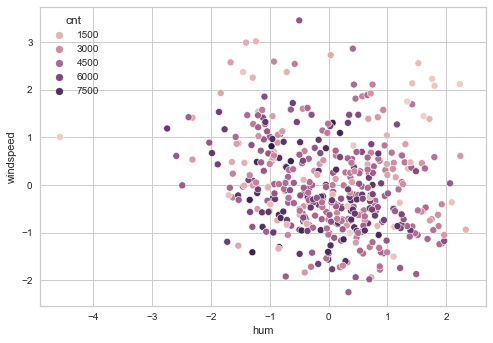

In [27]:
sns.scatterplot(x=X_train_standarized.iloc[:,2], y=X_train_standarized.iloc[:,3], hue=y_train)

<AxesSubplot:xlabel='atemp', ylabel='mnth_3'>

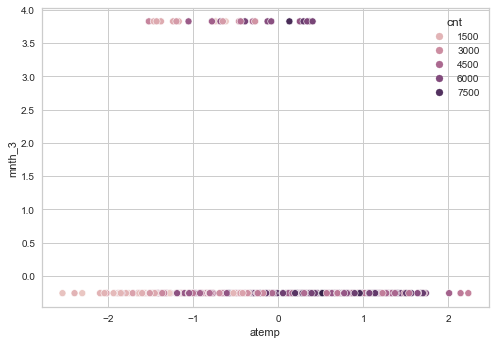

In [28]:
sns.scatterplot(x=X_train_standarized.iloc[:,1], y=X_train_standarized.iloc[:,6], hue=y_train)

In [29]:
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[1.30273019e-01 8.71915750e-02 6.66304302e-02 5.57958096e-02
 5.31157213e-02 4.74691061e-02 4.49330873e-02 4.35336520e-02
 4.25992093e-02 4.04475253e-02 3.95219948e-02 3.89814916e-02
 3.77187185e-02 3.75791794e-02 3.72686889e-02 3.47835330e-02
 3.37165206e-02 3.05115174e-02 2.90290970e-02 2.46184593e-02
 1.52625829e-02 1.09938428e-02 6.32280553e-03 4.94322180e-03
 3.41504324e-03 2.63664318e-03 6.16794309e-04 9.07306235e-05]
[0.13027302 0.21746459 0.28409502 0.33989083 0.39300656 0.44047566
 0.48540875 0.5289424  0.57154161 0.61198914 0.65151113 0.69049262
 0.72821134 0.76579052 0.80305921 0.83784274 0.87155926 0.90207078
 0.93109988 0.95571834 0.97098092 0.98197476 0.98829757 0.99324079
 0.99665583 0.99929248 0.99990927 1.        ]


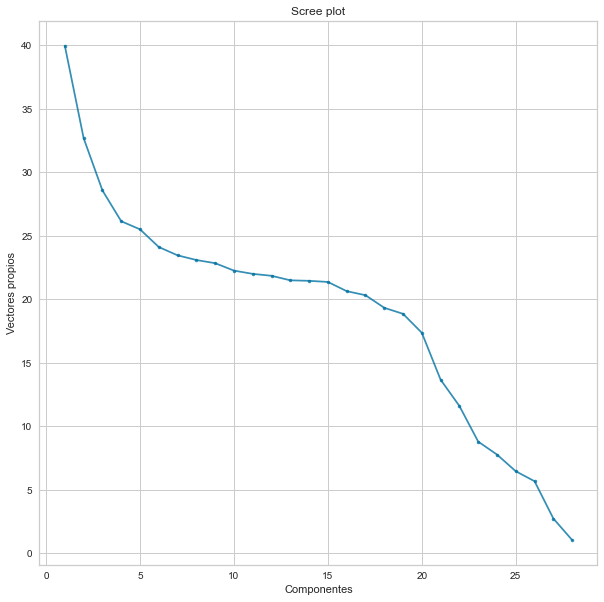

In [30]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

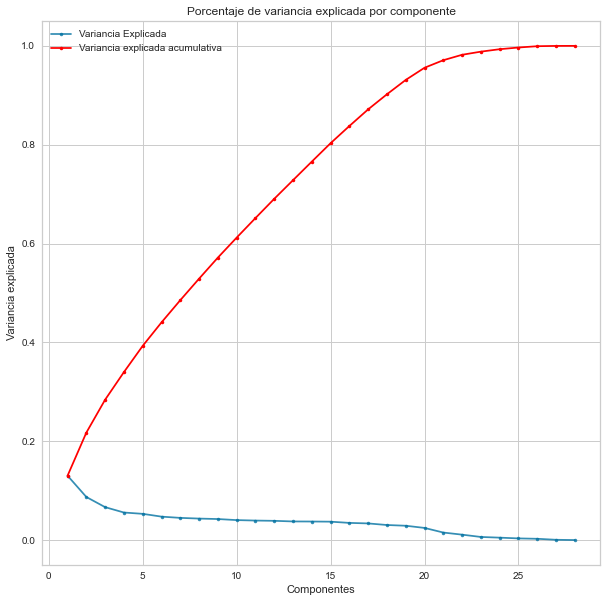

In [31]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

La varianza explicativa acumulada nos muestra que necesitamos un número muy grande de componentes para retener la mayor parante de la información. Podemos ver que solo usando los dos primeros componentes no podemos explicar la mayor parte de la varianza de los datos.

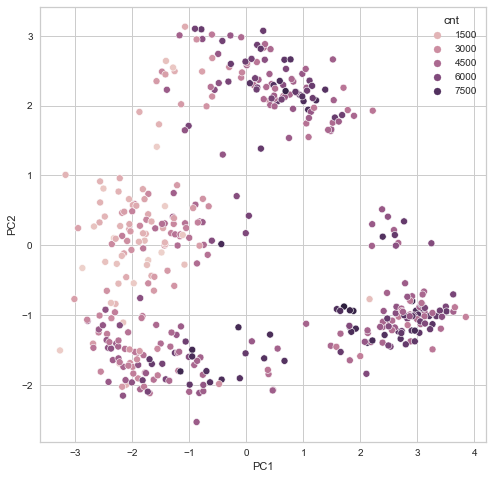

In [32]:
transformed_train = myPCA.transform(X_train_standarized[X_train.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train)

In [33]:
import plotly.express as px

fig = px.scatter_3d(X_train_standarized, x='PC1', y='PC2', z='PC3',color=y_train)
fig.show()

Como vemos tanto en el gráfico 2D, como 3D, únicamente con dos componentes no nos es suficente para poder separar bien los datos. Aunque si que es cierto que podemos ver un cierto patrón en estos. Podemos ver que se nos forman cinco grupos, donde en cada uno de estos podemos ver como el distinto número de bicicletas contadas, se agrupa gracias a su similittud y se puede empezar a intuir la distinción de la variable objectivo en base al número de biciletas contadas.

Notamos que el PCA variará en función de como hagamos hecho la codificación de one-hot encoding, ya que si usamos `drop_first=True` nos permitirá ver mucha más información que si no usamos esta opción. Esto es así ya que al tener unicamente en cuenta k-1 features de k descomposiciones possibles de una feature, reducimos la colinealidad y nos permite visualizar mejor los datos.

##### Como curiosidad podemos ver el gráfico de loadings i fijarnos en la longitud de los vectors que influyen en cada componente

In [34]:
loadings = myPCA.components_.T * np.sqrt(myPCA.explained_variance_ratio_)

fig = px.scatter(X_train_standarized, x='PC1', y='PC2', color=y_train)

for i, feature in enumerate(X_train.columns):
    fig.add_shape(type='line',x0=0, y0=0,x1=loadings[i, 0],y1=loadings[i, 1])
    fig.add_annotation(x=loadings[i, 0],y=loadings[i, 1],ax=0, ay=0,xanchor="center",yanchor="bottom",text=feature,)
fig.show()

#### c) La variable a predecir es un conteo. En este caso podría tener sentido utilizar un regresor que use un modelo adecuado para este tipo de datos como el $\texttt{PoissonRegressor}$ de scikit-learn. Veréis que tiene un parámetro de regularización $\texttt{alpha}$ que necesitaréis ajustar usando validación cruzada. Con el mejor parámetro de regularización según el error de validación cruzada, ajustad el modelo con los datos de entrenamiento y calculad la $\textit{calidad}$ del modelo con los datos de test.

Es importante aclara que Poisson no admite valores negativos para nuestra variable objetivo por lo que si es necesario haria falta deshacernos de ellos

In [35]:
poisson_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
alphas = [1e-10,1e-5,1e-4,1e-3,1e-2,0,0.1, 0.5,1,5,10,40,42,43,45,46,47,48,49,50,53,54,60,70,80,100,1000,10000]
# We calculate the cross-validation metrics for each lambda 
for alpha_val in alphas:
    kf = KFold(n_splits=10)
    i=1
    cv_mse = []
    cv_nmse = []
    cv_r2 = []

    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        pr = PoissonRegressor(alpha=alpha_val, max_iter=3000)
        pr.fit(x_train_fold,y_train_fold)
        y_pred_fold = pr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)
    poisson_cross_val_metrics.loc[f'Alpha={alpha_val}',:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]

poisson_cross_val_metrics.sort_values(by='mean R2',ascending=False)

mean MSE mean norm_MSE   mean R2
Alpha=40       737884.360687      0.210259  0.789741
Alpha=42       738819.421517      0.210447  0.789553
Alpha=43       739316.345237       0.21055   0.78945
Alpha=45       740374.591251      0.210778  0.789222
Alpha=46       740932.502394        0.2109    0.7891
Alpha=47        741506.85045      0.211029  0.788971
Alpha=48       742100.224631      0.211163  0.788837
Alpha=49       742707.748272      0.211302  0.788698
Alpha=50       743332.974191      0.211447  0.788553
Alpha=53       745294.632853       0.21191   0.78809
Alpha=54       745975.455371      0.212072  0.787928
Alpha=60        750321.33325      0.213134  0.786866
Alpha=10       743632.246373      0.213799  0.786201
Alpha=70       758359.931048      0.215161  0.784839
Alpha=5        752187.308609      0.216857  0.783143
Alpha=80       767134.794797       0.21743   0.78257
Alpha=1        761652.155287       0.22036   0.77964
Alpha=0.5      762687.833264      0.220887  0.779113
Alpha=0.1      764146.275542      0.221708  0.778292
Alpha=0.01     765073.968037      0.222156  0.777844
Alpha=0.001    765207.349314      0.222217  0.777783
Alpha=0.0001   765204.338072      0.222218  0.777782
Alpha=0        765212.792258      0.222221  0.777779
Alpha=1e-10    765213.093281      0.222221  0.777779
Alpha=1e-05     765216.92563      0.222222  0.777778
Alpha=100      786158.914108      0.222451  0.777549
Alpha=1000    1634979.081373      0.457587  0.542413
Alpha=10000   3204066.573809      0.896694  0.103306

In [36]:
plt.figure(figsize = (20,1));
weights = pd.DataFrame({'poison_cv':poison_cv.coef_},index=X_train.columns)
weights.T

NameError: name 'poison_cv' is not defined

<Figure size 1440x72 with 0 Axes>

In [37]:
plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['poison_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

<Figure size 1440x72 with 0 Axes>

##### Vemos que la mejor alpha obtenida es 45

In [39]:
poison_cv = PoissonRegressor(alpha=40, max_iter=3000).fit(X_train,y_train);
print("Poisson coefs:\n",poison_cv.coef_);

Poisson coefs:
 [ 4.32666723e-01  4.49879667e-01 -1.75805839e-01 -1.74863264e-01
  4.26785167e-01 -1.41389515e-04  1.32016198e-01  7.92426193e-02
  1.22075503e-01  7.70177720e-02 -1.28545244e-02  4.64148049e-02
  1.77427176e-01  9.51491818e-02 -3.30073717e-03 -2.38378596e-02
  2.55028835e-01  2.32473102e-01  3.82093358e-01 -1.46366501e-01
  3.01444164e-02  3.73707846e-02  4.15452795e-02  3.98239765e-02
  6.73498242e-02  6.05696839e-02 -1.29229672e-01 -4.27199223e-01]


In [40]:
print("Train error:",poison_cv.score(X_train,y_train));
print("Test error:",poison_cv.score(X_test,y_test));

Train error: 0.8043410705182932
Test error: 0.8175578775054831


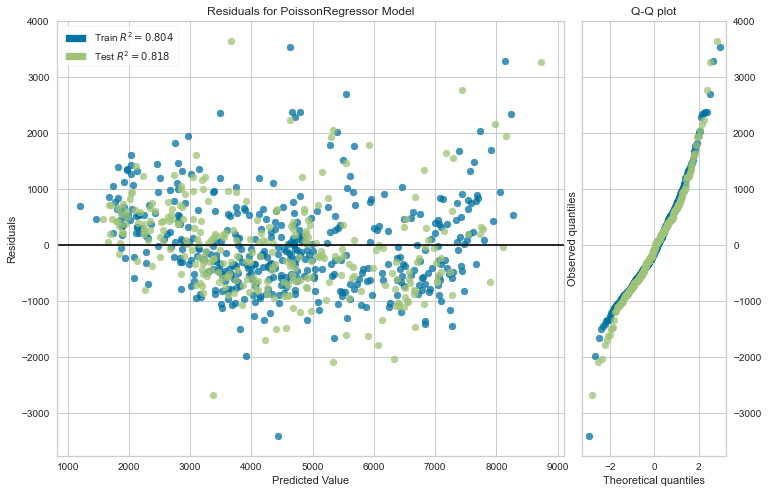

In [41]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(poison_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

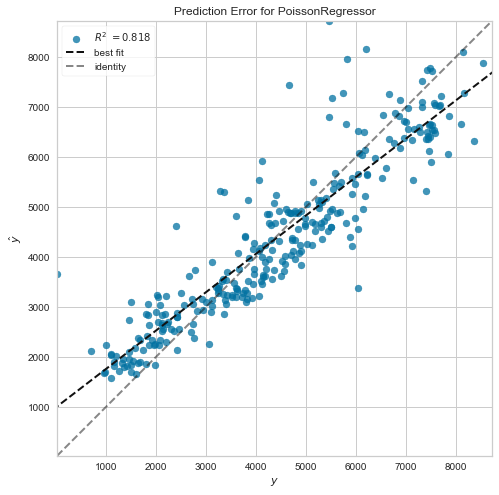

In [42]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

##### Calidad del modelo con los datos de test.

In [43]:
r2_results2 = pd.DataFrame({'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,poison_cv.predict(X_train))]
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

poison_cv
CV R2      0.817558
Train R2   0.824314
lambda    40.000000

#### d) A veces el modelo que parece adecuado no lo es tanto después de todo. Ajustad una regresión lineal a los datos y calculad la $\textit{calidad}$ del modelo empleando validación cruzada y con los datos de test.

In [44]:
lr = LinearRegression();
lr.fit(X_train,y_train);
y_pred = lr.predict(X_train);

weights = lr.coef_
intercept = lr.intercept_

print('Pesos: \n', weights[:])
print('Interceptor: \n', intercept)

Pesos: 
 [   16.79405741  4282.52773232 -1366.36161831  -839.43138958
  1958.82284427   168.85208793   552.80219394   350.91978208
   555.96513999   243.73796465  -332.34889742   -30.510251
   788.08951143   229.98253505  -346.38672878  -180.6745111
   874.10215952   984.79884172  1660.52750405  -731.29461972
   179.94844639   249.19059714   330.27132971   279.07100953
   412.29193198   421.3583805   -570.37840828 -1842.5228962 ]
Interceptor: 
 1460.9547652233232


In [45]:
import statsmodels.api
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.00
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          4.44e-148
Time:                        18:26:45   Log-Likelihood:                -3520.4
No. Observations:                 438   AIC:                             7099.
Df Residuals:                     409   BIC:                             7217.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1460.9548    303.399      4.815      0.000     864.538    2057.371
temp            16.7941   2377.175      0.007      0.994   -4656.212    4689.800
atemp         4282.5277   2422.186      1.768      0.078    -478.960    9044.015
hum          -1366.3616    358.760     -3.809      0.000   -2071.606    -661.117
windspeed     -839.4314    245.454     -3.420      0.001   -1321.940    -356.923
yr_1          1958.8228     76.120     25.733      0.000    1809.188    2108.458
mnth_2         168.8521    191.457      0.882      0.378    -207.511     545.215
mnth_3         552.8022    229.813      2.405      0.017     101.039    1004.565
mnth_4         350.9198    346.105      1.014      0.311    -329.447    1031.287
mnth_5         555.9651    368.272      1.510      0.132    -167.977    1279.907
mnth_6         243.7380    391.416      0.623      0.534    -525.700    1013.176
mnth_7        -332.3489    414.451     -0.802      0.423   -1147.069     482.371
mnth_8         -30.5103    406.753     -0.075      0.940    -830.097     769.076
mnth_9         788.0895    353.091      2.232      0.026      93.990    1482.189
mnth_10        229.9825    312.772      0.735      0.463    -384.858     844.823
mnth_11       -346.3867    303.930     -1.140      0.255    -943.847     251.074
mnth_12       -180.6745    235.257     -0.768      0.443    -643.139     281.790
season_2       874.1022    264.042      3.310      0.001     355.053    1393.151
season_3       984.7988    286.818      3.434      0.001     420.977    1548.621
season_4      1660.5275    238.480      6.963      0.000    1191.728    2129.327
holiday_1     -731.2946    249.512     -2.931      0.004   -1221.781    -240.808
weekday_1      179.9484    144.972      1.241      0.215    -105.034     464.931
weekday_2      249.1906    138.495      1.799      0.073     -23.061     521.442
weekday_3      330.2713    138.655      2.382      0.018      57.705     602.837
weekday_4      279.0710    139.013      2.008      0.045       5.802     552.340
weekday_5      412.2919    141.186      2.920      0.004     134.752     689.832
weekday_6      421.3584    133.805      3.149      0.002     158.327     684.390
weathersit_2  -570.3784    100.939     -5.651      0.000    -768.803    -371.953
weathersit_3 -1842.5229    266.950     -6.902      0.000   -2367.288   -1317.758
==============================================================================
Omnibus:                       75.338   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.601
Skew:                          -0.874   Prob(JB):                     1.00e-39
Kurtosis:                       5.605   Cond. No.                         160.
==============================================================================

Notes:
[1] Stand

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



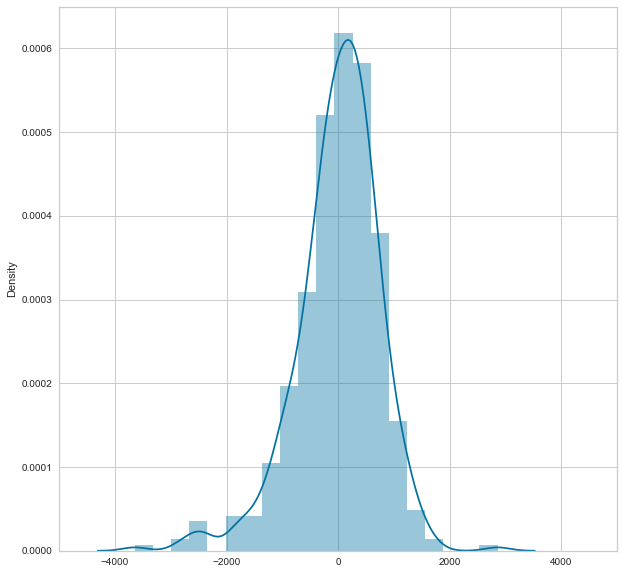

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-5000,5000])
sns.distplot(result.resid,bins=20);

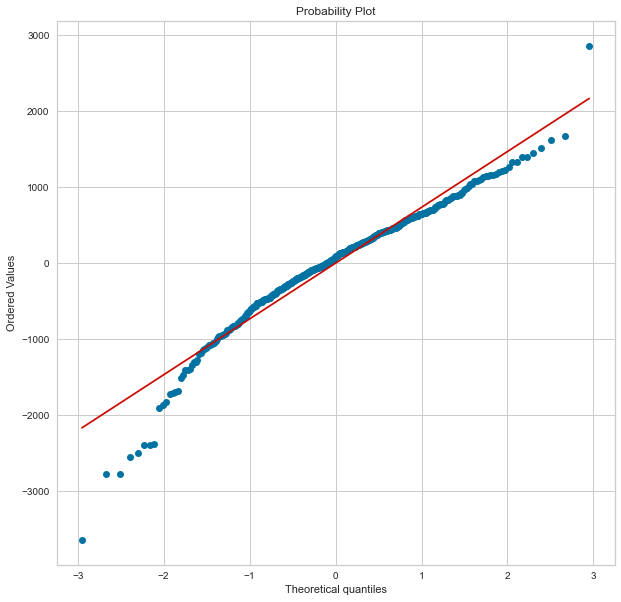

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
stats.probplot(result.resid, plot=plt);

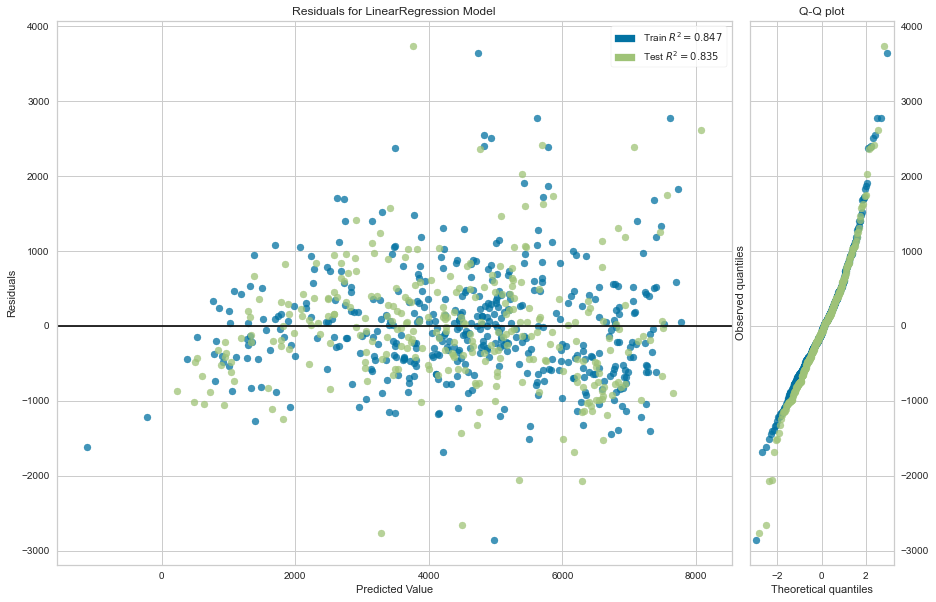

In [48]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

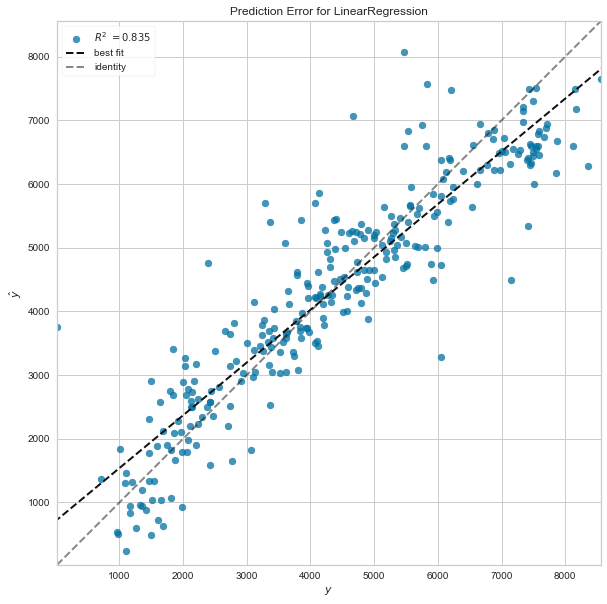

In [49]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

##### Métricas:

In [50]:
N = X_train.shape[0]

#MSE
prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train - prediction)**2)/N
mean_square_error

560776.24190017

In [51]:
#NMSE Normalized vemos que el NMSE no llega a 0, lo que nos haría decir que tenemos una predicción perfecta
norm_mse_sk = 1-r2_score(y_train,prediction)
norm_mse_sk

0.15278481763857

In [52]:
# R^2 vemos que nuestro modelo de regresión lineal solo explica un ~84.72% de la variable objetivo
R_squared_sk = r2_score(y_train,prediction) 
R_squared_sk

0.84721518236143

##### Aplicamos validación cruzada

In [53]:
cross_val_metrics = pd.DataFrame(columns=['MSE', 'norm_MSE', 'R2'])

#considerar canviar la varible del kf per 5, val no és viable
kf = KFold(n_splits=10)
i=1
for train_index, test_index in kf.split(X_train):
    print('Split {}: \n\tTest Folds: [{}] \n\tTrain Folds {}'.format(i, i, [j for j in range(1,11) if j != i]));
    
    x_train_fold = X_train.values[train_index]
    y_train_fold = y_train.values[train_index]
    x_test_fold = X_train.values[test_index,:]
    y_test_fold = y_train.values[test_index]
    
    lr = LinearRegression().fit(x_train_fold,y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
    fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
    fold_r2 = r2_score(y_test_fold, y_pred_fold)
    print(f'\tMSE: {fold_mse:3.3f} NMSE: {fold_nmse:3.3f} R2: {fold_r2:3.3f}')

    cross_val_metrics.loc[f'Fold {i}', :] = [fold_mse,fold_nmse, fold_r2]
    i+=1

Split 1: 
	Test Folds: [1] 
	Train Folds [2, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 639733.509 NMSE: 0.200 R2: 0.800
Split 2: 
	Test Folds: [2] 
	Train Folds [1, 3, 4, 5, 6, 7, 8, 9, 10]
	MSE: 554815.240 NMSE: 0.149 R2: 0.851
Split 3: 
	Test Folds: [3] 
	Train Folds [1, 2, 4, 5, 6, 7, 8, 9, 10]
	MSE: 673389.187 NMSE: 0.164 R2: 0.836
Split 4: 
	Test Folds: [4] 
	Train Folds [1, 2, 3, 5, 6, 7, 8, 9, 10]
	MSE: 879439.941 NMSE: 0.207 R2: 0.793
Split 5: 
	Test Folds: [5] 
	Train Folds [1, 2, 3, 4, 6, 7, 8, 9, 10]
	MSE: 703448.715 NMSE: 0.188 R2: 0.812
Split 6: 
	Test Folds: [6] 
	Train Folds [1, 2, 3, 4, 5, 7, 8, 9, 10]
	MSE: 752461.209 NMSE: 0.336 R2: 0.664
Split 7: 
	Test Folds: [7] 
	Train Folds [1, 2, 3, 4, 5, 6, 8, 9, 10]
	MSE: 906209.365 NMSE: 0.245 R2: 0.755
Split 8: 
	Test Folds: [8] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 9, 10]
	MSE: 597667.316 NMSE: 0.149 R2: 0.851
Split 9: 
	Test Folds: [9] 
	Train Folds [1, 2, 3, 4, 5, 6, 7, 8, 10]
	MSE: 548354.203 NMSE: 0.165 R2: 0.835
Split 10: 
	Test Fo

In [54]:
cross_val_metrics.loc['Mean',:] = cross_val_metrics.mean()
cross_val_metrics

MSE  norm_MSE        R2
Fold 1   639733.509363  0.200135  0.799865
Fold 2   554815.239977  0.149287  0.850713
Fold 3   673389.186627  0.163923  0.836077
Fold 4   879439.940818  0.207292  0.792708
Fold 5   703448.715269  0.188174  0.811826
Fold 6   752461.209294  0.336225  0.663775
Fold 7   906209.365459  0.244531  0.755469
Fold 8   597667.315603    0.1492    0.8508
Fold 9   548354.203211  0.164944  0.835056
Fold 10  432877.343731  0.124097  0.875903
Mean     668839.602935  0.192781  0.807219

In [55]:
lr = LinearRegression().fit(X_train,y_train);
folds_r2 = cross_val_score(lr, X_train,y_train, cv=10, scoring='r2')
lr_r2 = np.mean(folds_r2) 
folds_r2, lr_r2

(array([0.79986496, 0.85071341, 0.83607665, 0.79270761, 0.81182553,
        0.6637749 , 0.75546904, 0.85080047, 0.83505573, 0.87590293]),
 0.8072191222435693)

In [56]:
weights = pd.DataFrame({'lr':lr.coef_},index=X_train.columns)
weights.T

temp        atemp          hum  windspeed         yr_1      mnth_2  \
lr  16.794057  4282.527732 -1366.361618 -839.43139  1958.822844  168.852088   

        mnth_3      mnth_4     mnth_5      mnth_6  ...     season_4  \
lr  552.802194  350.919782  555.96514  243.737965  ...  1660.527504   

    holiday_1   weekday_1   weekday_2  weekday_3  weekday_4   weekday_5  \
lr -731.29462  179.948446  249.190597  330.27133  279.07101  412.291932   

    weekday_6  weathersit_2  weathersit_3  
lr  421.35838   -570.378408  -1842.522896  

[1 rows x 28 columns]

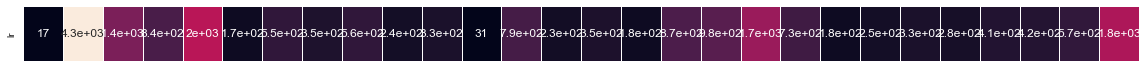

In [57]:
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

In [58]:
r2_results = pd.DataFrame({'lr':lr_r2},index=['CV R2'])
valorLRr2 = lr_r2
r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results

lr
CV R2     0.807219
Train R2  0.847215
lambda    0.000000

#### RESULTADOS

In [59]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'poison_cv':poison_cv.score(X_test,y_test)},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,poison_cv.predict(X_train))]

r2_results2.loc['lambda','lr']=0
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2

lr  poison_cv
CV R2     0.807219   0.817558
Train R2  0.847215   0.824314
lambda    0.000000  40.000000

Podemos ver que segun las métricas, el modelo que ajusta mejor los datos es el **modelo de Poison** con una alpha de 45 utilizada con el conjunto de datos estandarizados con variables categóricas, y con una $R^{2}$ tanto para el conjunto de entrenamineto como validación cruzada muy aceptables. Aún así, podemos ver que a la hora de generalizar el modelo, el que funciona mejor es el modelo de **regresión lineal**. Este nos da una $R^{2}$ ligeramente mejor que la obtenida con Poison. Concretamente, 0.835 con 0.824 de Poison. 

Como podemos ver ambos modelos no sobreajustan los datos.

Recordamos los gráficos dónde se observa:

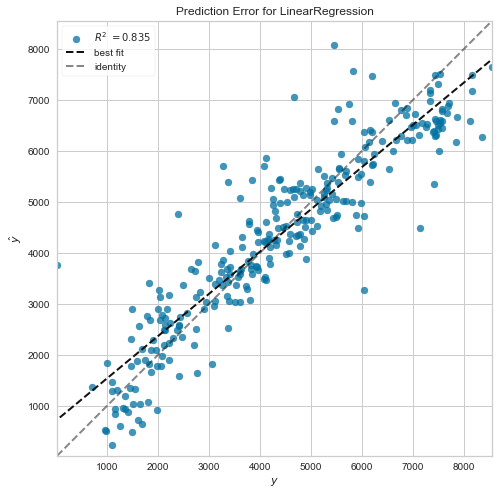

In [60]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

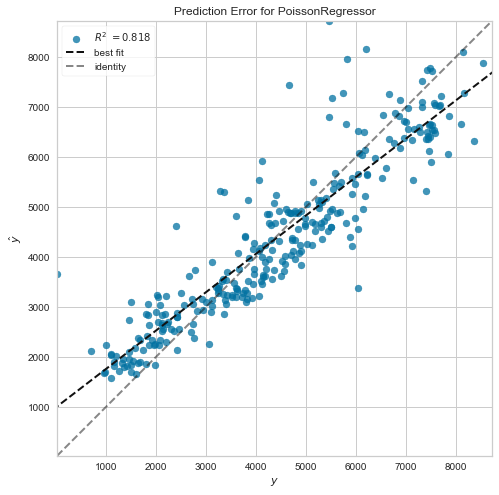

In [61]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(poison_cv, X_test, y_test, is_fitted=True)

#### e) Cuando se trata de entender un problema, es útil reducir el número de atributos en el modelo. Ajustad una regresión LASSO (ajustando la regularización usando la versión CV del modelo) y calculad la $\textit{calidad}$ del modelo con los datos de test.

In [62]:
lasso_cv = LassoCV(alphas=alphas,cv=10).fit(X_train,y_train)
lasso_r2 = np.mean(cross_val_score(lasso_cv, X_train,y_train))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1426097.7093362212, tolerance: 146044.33528223351

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549261.0021217465, tolerance: 146044.33528223351

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1556973.9045020938, tolerance: 146044.33528223351

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iter

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 114349879.51211143, tolerance: 145730.96112151898

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1642126.8685172498, tolerance: 116060.92001714285

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Dual

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 86225211.82841255, tolerance: 114543.59586857143

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 86335064.93061674, tolerance: 114543.59586857143

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Dualit

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 927327.5931191444, tolerance: 115908.25329714287

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 991172.625156641, tolerance: 115908.25329714287

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 994756.7437397242, tolerance: 115908.25329714287

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iteratio

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 76859181.82337004, tolerance: 115701.78889714286

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 77254891.57985687, tolerance: 115701.78889714286

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Dualit

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74578830.83210157, tolerance: 107730.3932136076

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74899864.87255979, tolerance: 107730.3932136076

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality 

Best lambda: 0.5 R2 score: 0.8142083740816857


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 95071516.9179604, tolerance: 117732.58729493673

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 971862.2546633482, tolerance: 110840.12093259493

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063577.937875688, tolerance: 110840.12093259493

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iteratio

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1622339.701866299, tolerance: 129688.00469171429

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774128.255642712, tolerance: 129688.00469171429

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1785117.809234947, tolerance: 129688.00469171429

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterati

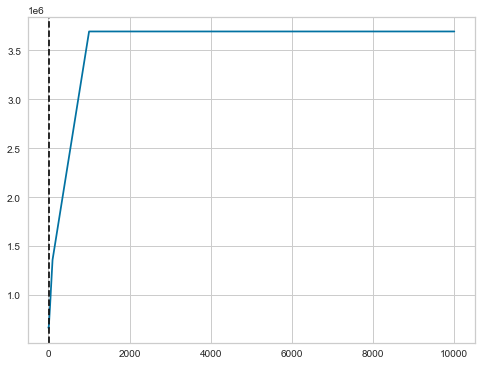

In [63]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=alphas));
vis.fit(X_train, y_train);

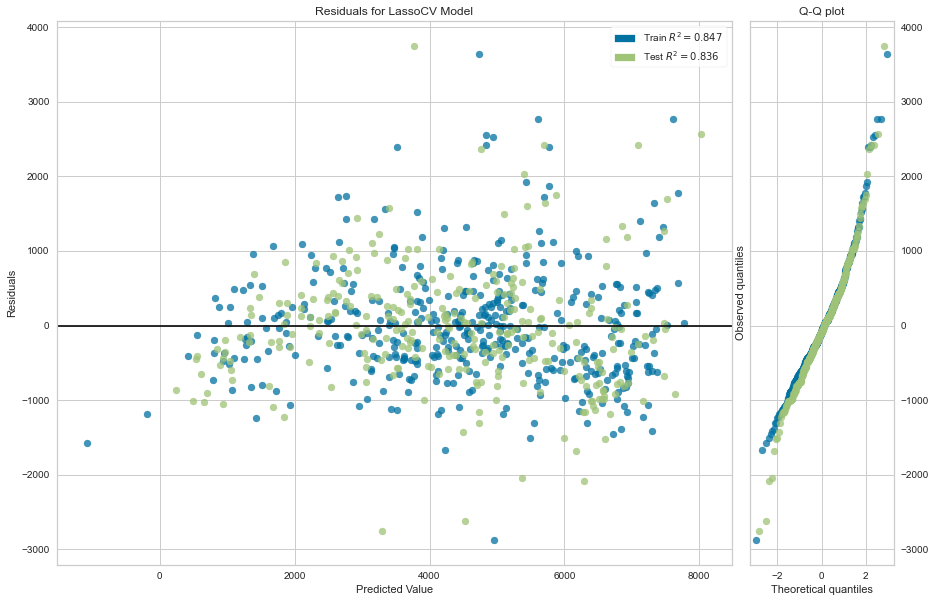

In [64]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(15,10));
viz = residuals_plot(lasso_cv, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

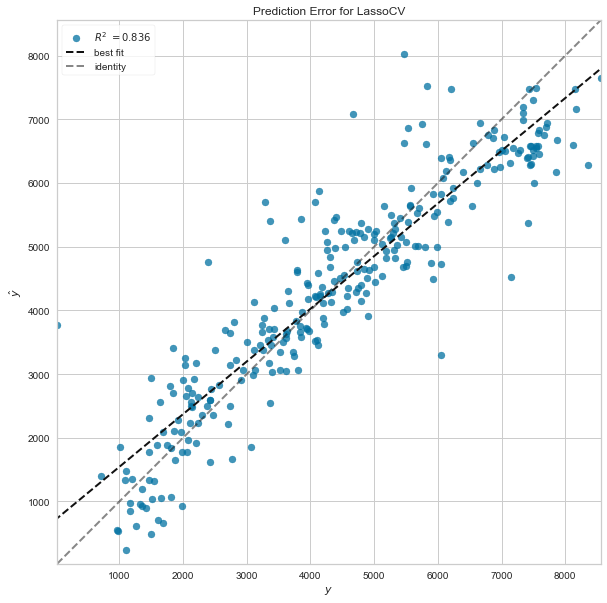

In [65]:
#calculamos el error de predicción del modelo
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(15,10))
visualizer = prediction_error(lasso_cv, X_test, y_test, is_fitted=True)

In [66]:
weights = pd.DataFrame({'lasso_cv':lasso_cv.coef_},index=X_train.columns)
weights.T

temp        atemp          hum   windspeed         yr_1  \
lasso_cv  91.649393  4215.242775 -1335.964165 -824.765663  1957.394925   

              mnth_2      mnth_3      mnth_4     mnth_5      mnth_6  ...  \
lasso_cv  143.188984  521.048402  308.133952  514.17395  217.167389  ...   

             season_4   holiday_1   weekday_1  weekday_2   weekday_3  \
lasso_cv  1625.105754 -709.857357  151.761479   225.0639  308.059341   

           weekday_4   weekday_5   weekday_6  weathersit_2  weathersit_3  
lasso_cv  258.743723  387.627097  398.094018   -570.605437  -1828.542209  

[1 rows x 28 columns]

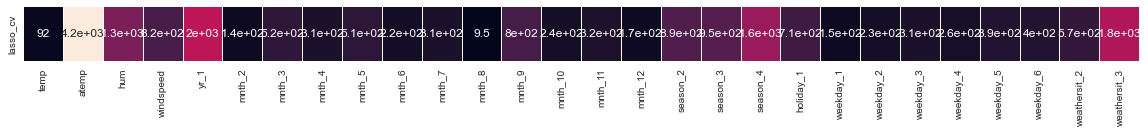

In [67]:
plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

In [68]:
r2_results3 = pd.DataFrame({'lasso_cv':lasso_r2},index=['CV R2'])

r2_results3.loc['Train R2', :] =[r2_score(y_train,lasso_cv.predict(X_train))]
r2_results3.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results3

lasso_cv
CV R2     0.814208
Train R2  0.847147
lambda    0.500000

##### CONCLUSIONES

In [69]:
r2_results2 = pd.DataFrame({'lr':lr_r2,'poison_cv':poison_cv.score(X_test,y_test),'lasso_cv':lasso_r2},index=['CV R2'])
r2_results2.loc['Train R2', :] = [r2_score(y_train,lr.predict(X_train)),
                                  r2_score(y_train,poison_cv.predict(X_train)),
                                  r2_score(y_train,lasso_cv.predict(X_train))]

r2_results2.loc['lambda','lr']= 0
r2_results2.loc['lambda','poison_cv']= poison_cv.alpha
r2_results2.loc['lambda','lasso_cv']= lasso_cv.alpha_
r2_results2

lr  poison_cv  lasso_cv
CV R2     0.807219   0.817558  0.814208
Train R2  0.847215   0.824314  0.847147
lambda    0.000000  40.000000  0.500000

#### f) Ahora podemos analizar y comparar los resultados:
* Comparad los valores pronosticados con los valores reales de los tres modelos y sus calidades. ¿Qué modelo os parece mejor? ¿Por qué?
* Analizad los pesos de la regresión lineal y LASSO. ¿Qué atributos son más importantes? ¿Hay atributos que no son relevantes?
* Comparad las predicciones de la regresión de Poisson y la regresión de LASSO. ¿Hay alguna diferencia en su comportamiento? ¿Qué creéis que está pasando?